# 1. Wczytanie danych

In [2]:
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
# Ustawienie SEED
SEED = 42
import numpy as np, random, os

random.seed(SEED)
np.random.seed(SEED)
os.environ['PYTHONHASHSEED'] = str(SEED)
from sklearn.utils import check_random_state

rng = check_random_state(SEED)

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
# Ustawienia wyświetlania
pd.set_option('display.max_columns', 100)
sns.set(style="whitegrid", palette="pastel", font_scale=1.1)

# Ścieżka do danych
DATA_PATH = Path("data/zbiór_2.csv")

# Wczytanie danych
df = pd.read_csv(DATA_PATH)

print(f"Wczytano dane: {df.shape[0]} wierszy, {df.shape[1]} kolumn")

# Podgląd danych
display(df.head())


Wczytano dane: 3000 wierszy, 220 kolumn


szczegolnaFormaPrawna_Symbol  formaWlasnosci_Symbol  pkdKod  \
0                           117                    224    4120   
1                           117                    214    6820   
2                           117                      0    4646   
3                           117                    214    7010   
4                           117                    216    6201   

   wsk_liczba_dni_istnienia     Aktywa  Aktywa_trwale  \
0                      1501  667091.16       87750.43   
1                      1570  180157.00           0.00   
2                      1952  297880.73       43721.66   
3                      1361   11599.10         100.00   
4                      2170   45883.96        1847.82   

   Wartosci_niematerialne_prawne  Wartosc_firmy  Rzeczowe_aktywa_trwale  \
0                            0.0            0.0                87750.43   
1                            0.0            0.0                    0.00   
2                            0.0            0.0                43721.66   
3                            0.0            0.0                    0.00   
4                            0.0            0.0                    0.00   

   Srodki_trwale  Naleznosci_dlugoterminowe  Inwestycje_dlugoterminowe  \
0       87750.43                        0.0                        0.0   
1           0.00                        0.0                        0.0   
2       43721.66                        0.0                        0.0   
3           0.00                        0.0                      100.0   
4           0.00                        0.0                        0.0   

   Rozliczenia_miedzyokresowe_dlugie  Aktywa_obrotowe    Zapasy  \
0                                0.0        579340.73  95439.45   
1                                0.0        180157.00      0.00   
2                                0.0        254159.07  57937.08   
3                                0.0         11499.10    926.83   
4                                0.0         44036.14      0.00   

   Naleznosci_krotkoterminowe  Naleznosci_dostaw_uslug_12m_powiazane  \
0                   339582.60                                    0.0   
1                        0.00                                    0.0   
2                   136610.41                                    0.0   
3                      828.83                                    0.0   
4                    12125.66                                    0.0   

   Naleznosci_dostaw_uslug_pow12m_powiazane  \
0                                       0.0   
1                                       0.0   
2                                       0.0   
3                                       0.0   
4                                       0.0   

   Naleznosci_dostaw_uslug_12m_kapitale  \
0                                   0.0   
1                                   0.0   
2                                   0.0   
3                                   0.0   
4                                   0.0   

   Naleznosci_dostaw_uslug_pow12m_kapitale  \
0                                      0.0   
1                                      0.0   
2                                      0.0   
3                                      0.0   
4                                      0.0   

   Naleznosci_dostaw_uslug_12m_pozostale  \
0                              136778.56   
1                                   0.00   
2                               78396.98   
3                                   0.00   
4                                   0.00   

   Naleznosci_dostaw_uslug_pow12m_pozostale  \
0                                       0.0   
1                                       0.0   
2                                       0.0   
3                                       0.0   
4                                       0.0   

   Naleznosci_dostaw_uslug_pozostale_sadowe  Inwestycje_krotkoterminowe  \
0                                       0.0                   133832.15   
1             


--- Braki danych (%) ---


RP_przeplywy_operacyjne             98.733333
wsk_pokrycie_zob_kr_gotowkowe_2     98.733333
wsk_zadluzenia_gotowki_2            98.733333
wsk_akt_generowania_got_2           98.733333
wsk_pokrycie_wyd_fin_gotowkowe_2    98.733333
wsk_zysk_CF_operacyjny              98.733333
RP_amortyzacja                      95.200000
wsk_plynnosc_biez_1                  3.633333
wsk_kapital_do_aktywa                1.700000
wsk_struktura_kap_wlasnego_s_2       1.666667
dtype: float64


--- Target distribution ---


default
0    87.033333
1    12.966667
Name: proportion, dtype: float64

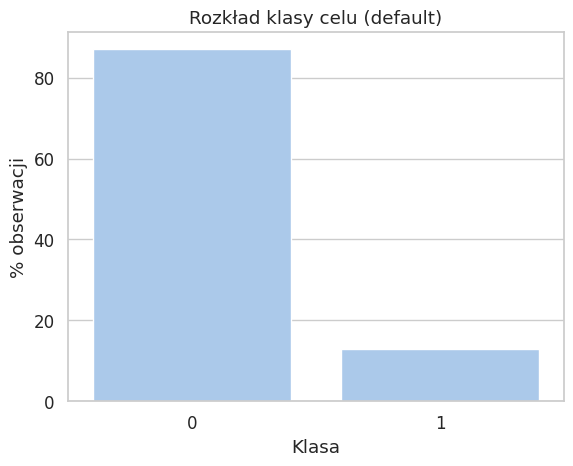

In [6]:
# Walidacja podstawowa

print("\n--- Braki danych (%) ---")
missing = df.isna().mean().sort_values(ascending=False) * 100
display(missing.head(10))

# Histogram targetu
if "default" in df.columns:
    default_counts = df["default"].value_counts(normalize=True) * 100
    print("\n--- Target distribution ---")
    display(default_counts)
    sns.barplot(x=default_counts.index, y=default_counts.values)
    plt.title("Rozkład klasy celu (default)")
    plt.xlabel("Klasa")
    plt.ylabel("% obserwacji")
    plt.show()
else:
    print("⚠️ Brak kolumny 'default' — sprawdź nazwę celu w danych!")

# 2. Przygotowanie danych (czyszczenie i kontrola jakości)

## 2.0 Start

In [7]:
from sklearn.impute import SimpleImputer
import numpy as np

In [8]:
print(f"Liczba obserwacji: {df.shape[0]}")
print(f"Liczba zmiennych: {df.shape[1]}")

Liczba obserwacji: 3000
Liczba zmiennych: 220


## 2.1 Usunięcie duplikatów

In [9]:
# Zduplikowane wiersze
dupes = df.duplicated().sum()
print(f"Liczba duplikatów: {dupes}")

Liczba duplikatów: 0


In [10]:
# Kolumny ze wszystkimi wartościami identycznymi
constant_cols = [c for c in df.columns if df[c].nunique() <= 1]
if constant_cols:
    print(f"Kolumny o jednej wartości (nieinformatywne): {constant_cols}")
    df = df.drop(columns=constant_cols)

Kolumny o jednej wartości (nieinformatywne): ['szczegolnaFormaPrawna_Symbol']


In [11]:
print(f"Liczba obserwacji: {df.shape[0]}")
print(f"Liczba zmiennych: {df.shape[1]}")

Liczba obserwacji: 3000
Liczba zmiennych: 219


## 2.2 Usunięcie kolumn z >90% braków

In [12]:
# Odsetek braków w kolumnach
missing = df.isna().mean().sort_values(ascending=False)
missing_df = missing.to_frame(name="% braków")
display(missing_df.head(15))

% braków
RP_przeplywy_operacyjne            0.987333
wsk_zadluzenia_gotowki_2           0.987333
wsk_akt_generowania_got_2          0.987333
wsk_pokrycie_wyd_fin_gotowkowe_2   0.987333
wsk_pokrycie_zob_kr_gotowkowe_2    0.987333
wsk_zysk_CF_operacyjny             0.987333
RP_amortyzacja                     0.952000
wsk_plynnosc_biez_1                0.036333
wsk_kapital_do_aktywa              0.017000
wsk_struktura_kap_wlasnego_s_2     0.016667
Aktywa                             0.000000
Rozliczenia_miedzyokresowe_dlugie  0.000000
Aktywa_obrotowe                    0.000000
Zapasy                             0.000000
Naleznosci_krotkoterminowe         0.000000

In [13]:
# Wyrzuć kolumny, które mają >90% braków
threshold = 0.9
cols_to_drop = missing[missing > threshold].index.tolist()
if cols_to_drop:
    print(f"Usuwam kolumny z >90% braków: {cols_to_drop}")
    df = df.drop(columns=cols_to_drop)

Usuwam kolumny z >90% braków: ['RP_przeplywy_operacyjne', 'wsk_zadluzenia_gotowki_2', 'wsk_akt_generowania_got_2', 'wsk_pokrycie_wyd_fin_gotowkowe_2', 'wsk_pokrycie_zob_kr_gotowkowe_2', 'wsk_zysk_CF_operacyjny', 'RP_amortyzacja']


In [14]:
# Odsetek braków w kolumnach (dla potwierdzenia)
missing = df.isna().mean().sort_values(ascending=False)
missing_df = missing.to_frame(name="% braków")
display(missing_df.head(5))

% braków
wsk_plynnosc_biez_1             0.036333
wsk_kapital_do_aktywa           0.017000
wsk_struktura_kap_wlasnego_s_2  0.016667
formaWlasnosci_Symbol           0.000000
Aktywa_trwale                   0.000000

## 2.3 Czyszczenie wartości INF / -INF

In [15]:
# Tylko kolumny liczbowe
num_df = df.select_dtypes(include=[np.number])

# Sprawdzenie, które kolumny mają wartości INF / -INF
inf_mask = np.isinf(num_df)
inf_cols = num_df.columns[inf_mask.any()].tolist()

if inf_cols:
    print(f"Kolumny zawierające INF / -INF: {len(inf_cols)}")
    print(" - " + ", ".join(inf_cols[:10]) + (" ..." if len(inf_cols) > 10 else ""))

    # Zamiana INF / -INF na NaN (tylko w liczbowych kolumnach)
    df[inf_cols] = df[inf_cols].replace([np.inf, -np.inf], np.nan)
    print("Wartości INF / -INF zostały zamienione na NaN.\n")
else:
    print("Brak wartości INF / -INF w danych.\n")

Kolumny zawierające INF / -INF: 3
 - wsk_kapital_do_aktywa, wsk_plynnosc_biez_1, wsk_struktura_kap_wlasnego_s_2
Wartości INF / -INF zostały zamienione na NaN.



## 2.4 Wykrywanie i ograniczanie outlierów (winsoryzacja / capping)

In [16]:
# Tylko kolumny liczbowe
num_cols_pre = df.select_dtypes(include=[np.number]).columns

# Diagnostyka (1%–99%)
desc = df[num_cols_pre].describe(percentiles=[0.01, 0.99]).T
desc["range"] = desc["99%"] - desc["1%"]

print("Przykładowe zakresy 1%–99% (pierwsze 10 kolumn):")
display(desc[["mean", "std", "1%", "99%", "range"]].head(10))

# Przycięcie wartości spoza 1%–99% (winsoryzacja / capping)
for col in num_cols_pre:
    if df[col].dtype.kind in "if":  # tylko liczby
        low, high = df[col].quantile(0.01), df[col].quantile(0.99)
        df[col] = np.clip(df[col], low, high)

print("\nOutliery zostały przycięte do przedziału 1%–99% wartości.")
print(f"Aktualny rozmiar danych: {df.shape[0]:,} wierszy × {df.shape[1]:,} kolumn\n")

Przykładowe zakresy 1%–99% (pierwsze 10 kolumn):


mean           std       1%  \
formaWlasnosci_Symbol          2.008570e+02  5.187920e+01     0.00   
pkdKod                         5.357259e+03  2.011731e+03   111.00   
wsk_liczba_dni_istnienia       4.021039e+03  2.828336e+03  1286.99   
Aktywa                         4.884416e+06  2.262178e+07     0.00   
Aktywa_trwale                  3.076991e+06  2.045302e+07     0.00   
Wartosci_niematerialne_prawne  5.589996e+04  9.241373e+05     0.00   
Wartosc_firmy                  3.567967e+03  9.367955e+04     0.00   
Rzeczowe_aktywa_trwale         1.467482e+06  1.235306e+07     0.00   
Srodki_trwale                  1.272441e+06  1.151651e+07     0.00   
Naleznosci_dlugoterminowe      6.934817e+04  2.074594e+06     0.00   

                                        99%         range  
formaWlasnosci_Symbol          2.270000e+02  2.270000e+02  
pkdKod                         9.319000e+03  9.208000e+03  
wsk_liczba_dni_istnienia       1.129311e+04  1.000612e+04  
Aktywa                         7.146199e+07  7.146199e+07  
Aktywa_trwale                  6.304092e+07  6.304092e+07  
Wartosci_niematerialne_prawne  5.643515e+05  5.643515e+05  
Wartosc_firmy                  0.000000e+00  0.000000e+00  
Rzeczowe_aktywa_trwale         2.555556e+07  2.555556e+07  
Srodki_trwale                  2.335986e+07  2.335986e+07  
Naleznosci_dlugoterminowe      1.867849e+05  1.867849e+05


Outliery zostały przycięte do przedziału 1%–99% wartości.
Aktualny rozmiar danych: 3,000 wierszy × 212 kolumn



## 2.6 Problematyczne kolumny

In [17]:
import pandas as pd

def pkd_to_section(code):
    if pd.isna(code):
        return None
    code = str(code).strip().zfill(4)   # 142 → "0142"
    two = int(code[:2])                 # pierwsze dwie cyfry

    if 1 <= two <= 3:
        return "A"
    elif 5 <= two <= 9:
        return "B"
    elif 10 <= two <= 33:
        return "C"
    elif two == 35:
        return "D"
    elif 36 <= two <= 39:
        return "E"
    elif 41 <= two <= 43:
        return "F"
    elif 45 <= two <= 47:
        return "G"
    elif 49 <= two <= 53:
        return "H"
    elif 55 <= two <= 56:
        return "I"
    elif 58 <= two <= 63:
        return "J"
    elif 64 <= two <= 66:
        return "K"
    elif two == 68:
        return "L"
    elif 69 <= two <= 75:
        return "M"
    elif 77 <= two <= 82:
        return "N"
    elif two == 84:
        return "O"
    elif two == 85:
        return "P"
    elif 86 <= two <= 88:
        return "Q"
    elif 90 <= two <= 93:
        return "R"
    elif 94 <= two <= 96:
        return "S"
    elif 97 <= two <= 98:
        return "T"
    elif two == 99:
        return "U"
    else:
        return "Other"

# nadpisanie kolumny pkdKod sekcją PKD
df["pkdKod"] = df["pkdKod"].apply(pkd_to_section)

## 2.7 Podział kolumn na numeryczne i kategoryczne

In [18]:
n_rows, n_cols = df.shape
print(f"Rozmiar danych: {n_rows:,} wierszy × {n_cols:,} kolumn")

target_col = "default"

# --- Znane zmienne kategoryczne ---
cat_cols = [
    "szczegolnaFormaPrawna_Symbol",
    "formaWlasnosci_Symbol",
    "schemat_wsk_bilans",
    "schemat_wsk_rzis",
    "pkdKod"
]

# --- Filtracja tylko tych, które są w danych ---
cat_cols = [c for c in cat_cols if c in df.columns]

# --- Automatycznie: reszta to numeryczne ---
num_cols = [c for c in df.columns if c not in cat_cols + [target_col]]

print(f"Kolumna celu: {target_col}")
print(f"Liczba zmiennych kategorycznych: {len(cat_cols)}")
print(f"Liczba zmiennych liczbowych: {len(num_cols)}")

# --- Wymuszenie typu category dla znanych kategorii ---
for c in cat_cols:
    if c in df.columns:
        df[c] = df[c].astype("category")

print("\nZmienne kategoryczne:")
for c in cat_cols:
    print(f" - {c}")

#
# Identyfikacja potencjalnych zmiennych kategorycznych
#
# potential_cat = []
#
# for col in df.columns:
#     if col not in cat_cols + [target_col]:
#         unique_count = df[col].nunique(dropna=True)
#         if df[col].dtype == "object" or unique_count <= 15:
#             potential_cat.append((col, unique_count))

# if potential_cat:
#     print("\nPotencjalne zmienne kategoryczne (do weryfikacji):")
#     for col, uniq in sorted(potential_cat, key=lambda x: x[1]):
#         print(f" - {col:40s} ({uniq} unikalnych wartości)")
# else:
#     print("\nBrak innych oczywistych zmiennych kategorycznych.")


Rozmiar danych: 3,000 wierszy × 212 kolumn
Kolumna celu: default
Liczba zmiennych kategorycznych: 4
Liczba zmiennych liczbowych: 207

Zmienne kategoryczne:
 - formaWlasnosci_Symbol
 - schemat_wsk_bilans
 - schemat_wsk_rzis
 - pkdKod


## 2.8 Imputacja braków danych

In [19]:
print("Diagnostyka braków danych przed imputacją:\n")

# --- Obliczenie braków ---
missing_df = (
    df.isna().mean().mul(100)
    .to_frame(name="% braków")
    .assign(liczba_braków=df.isna().sum())
    .query("`% braków` > 0")
    .sort_values("% braków", ascending=False)
)

if missing_df.empty:
    print("Brak braków danych w zbiorze.")
else:
    print(f"Liczba kolumn z brakami: {len(missing_df)} / {df.shape[1]}")
    display(missing_df.head(20))

# --- Kolumny z brakami (podział wg typu) ---
num_missing = [c for c in num_cols if df[c].isna().any()]
cat_missing = [c for c in cat_cols if df[c].isna().any()]

print(f"\nZmienne liczbowe z brakami ({len(num_missing)}):")
if num_missing:
    print(" - " + ", ".join(num_missing[:10]) + (" ..." if len(num_missing) > 10 else ""))
else:
    print(" - brak")

print(f"\nZmienne kategoryczne z brakami ({len(cat_missing)}):")
if cat_missing:
    print(" - " + ", ".join(cat_missing))
else:
    print(" - brak")

# --- Imputacja ---
if num_missing:
    imputer_median = SimpleImputer(strategy="median")
    df[num_missing] = imputer_median.fit_transform(df[num_missing])
    print(f"\nUzupełniono braki medianą w {len(num_missing)} kolumnach liczbowych.")

if cat_missing:
    imputer_mode = SimpleImputer(strategy="most_frequent")
    df[cat_missing] = imputer_mode.fit_transform(df[cat_missing])
    print(f"Uzupełniono braki najczęstszą wartością w {len(cat_missing)} kolumnach kategorycznych.")

print(f"\nAktualny rozmiar danych: {df.shape[0]:,} wierszy × {df.shape[1]:,} kolumn")

Diagnostyka braków danych przed imputacją:

Liczba kolumn z brakami: 3 / 212


% braków  liczba_braków
wsk_plynnosc_biez_1             34.033333           1021
wsk_struktura_kap_wlasnego_s_2   4.866667            146
wsk_kapital_do_aktywa            2.000000             60


Zmienne liczbowe z brakami (3):
 - wsk_kapital_do_aktywa, wsk_plynnosc_biez_1, wsk_struktura_kap_wlasnego_s_2

Zmienne kategoryczne z brakami (0):
 - brak

Uzupełniono braki medianą w 3 kolumnach liczbowych.

Aktualny rozmiar danych: 3,000 wierszy × 212 kolumn


## 2.9 Podsumowanie po Data Quality

In [20]:
# Po sekcji Data Quality
df_clean = df
y = df_clean["default"]
X = df_clean.drop(columns="default")

num_cols = [col for col in num_cols if col in X.columns]
cat_cols = [col for col in cat_cols if col in X.columns]

print(f"Aktualna liczba kolumn liczbowych: {len(num_cols)}")
print(f"Aktualna liczba kolumn kategorycznych: {len(cat_cols)}")

print("\nWymiary zbiorów:")
print(f"X: {X.shape[0]:,} wierszy × {X.shape[1]:,} kolumn")
print(f"y: {y.shape[0]:,} obserwacji\n")

print("Rozkład klasy docelowej (default):")
display(y.value_counts(normalize=True)
        .rename("udział (%)")
        .mul(100)
        .round(2)
        .to_frame())

Aktualna liczba kolumn liczbowych: 207
Aktualna liczba kolumn kategorycznych: 4

Wymiary zbiorów:
X: 3,000 wierszy × 211 kolumn
y: 3,000 obserwacji

Rozkład klasy docelowej (default):


udział (%)
default            
0             87.03
1             12.97

# 3. Exploratory Data Analysis (EDA)

In [129]:
# 3. EXPLORATORY DATA ANALYSIS (EDA)

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set(style="whitegrid")

# Upewniamy się, że mamy główne obiekty
df_eda = df_clean.copy()

print(f"Liczba obserwacji: {df_eda.shape[0]}")
print(f"Liczba cech: {df_eda.shape[1]}")
print(f"Zmienne numeryczne: {len(num_cols)}")
print(f"Zmienne kategoryczne: {len(cat_cols)}")


Liczba obserwacji: 3000
Liczba cech: 212
Zmienne numeryczne: 207
Zmienne kategoryczne: 4


## 3.1 Rozkład targetu

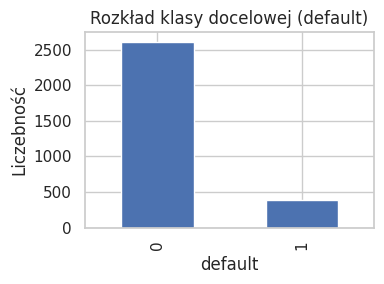

Udział procentowy klas:
default
0    0.8703
1    0.1297
Name: proportion, dtype: float64


In [130]:
plt.figure(figsize=(4, 3))
y.value_counts().plot(kind="bar")
plt.title("Rozkład klasy docelowej (default)")
plt.xlabel("default")
plt.ylabel("Liczebność")
plt.tight_layout()
plt.show()

print("Udział procentowy klas:")
print(y.value_counts(normalize=True).round(4))


## 3.2 Korelacje

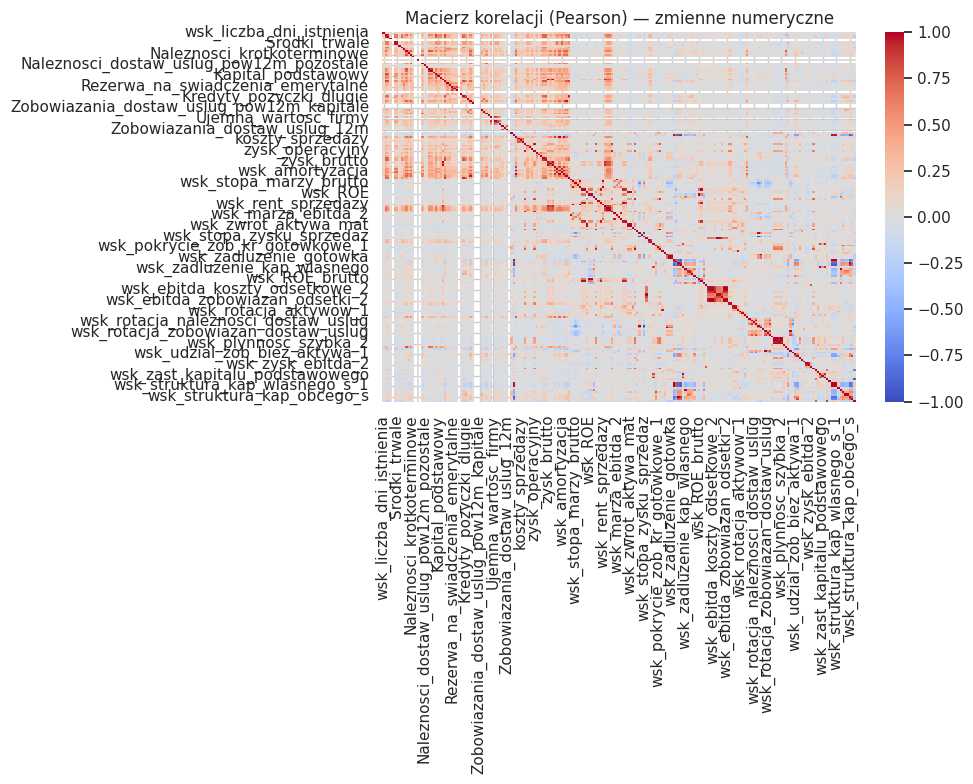

In [131]:
corr = df_eda[num_cols].corr(method="pearson")

plt.figure(figsize=(10, 8))
sns.heatmap(corr, cmap="coolwarm", center=0, vmin=-1, vmax=1)
plt.title("Macierz korelacji (Pearson) — zmienne numeryczne")
plt.tight_layout()
plt.show()

In [132]:
# Silne korelacje

strong_corrs = (
    corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))
        .stack()
        .reset_index()
)

strong_corrs.columns = ["var1", "var2", "corr"]
strong_corrs = strong_corrs.loc[strong_corrs["corr"].abs() > 0.9]
display(strong_corrs.sort_values("corr", ascending=False))

var1                             var2  \
12252                           wsk_ROS               wsk_rent_sprzedazy   
16140          wsk_koszty_fin_przychody   wsk_poziom_kosztow_finansowych   
15089              wsk_koszty_przychody  wsk_poziom_kosztow_operacyjnych   
14857          wsk_zysk_op_zobowiazania        wsk_zysk_operacyjny_zob_1   
16182      wsk_koszty_odsetki_przychody           wsk_zadluzenie_gotowka   
...                                 ...                              ...   
16642         wsk_ogolnego_zadluzenia_2     wsk_struktura_kap_wlasnego_1   
16345  wsk_udzial_kap_wlasnego_aktywa_1        wsk_ogolnego_zadluzenia_2   
8400              wsk_kapital_do_aktywa        wsk_ogolnego_zadluzenia_2   
15274          wsk_stopa_zysku_sprzedaz  wsk_poziom_kosztow_operacyjnych   
15039              wsk_koszty_przychody         wsk_stopa_zysku_sprzedaz   

           corr  
12252  1.000000  
16140  1.000000  
15089  1.000000  
14857  1.000000  
16182  1.000000  
...         ...  
16642 -0.920760  
16345 -0.920760  
8400  -0.989462  
15274 -0.999997  
15039 -0.999997  

[100 rows x 3 columns]

# 4. Regresja liniowa

## 4.1 Przygotowanie danych dla regresji logistycznej

In [21]:
X_lr = X.copy()
y_lr = y.copy()

### 4.1.1 Podział zbioru na treningowy, walidacyjny i testowy (ze stratyfikacją)

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(
    X_lr, y_lr,
    test_size=0.40,
    random_state=SEED,
    stratify=y_lr
)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp,
    test_size=0.50,
    random_state=SEED,
    stratify=y_temp
)

print("Zbiory danych utworzone:")
print(f"X_train: {X_train.shape}, X_val: {X_val.shape}, X_test: {X_test.shape}")
print(f"y_train: {y_train.shape}, y_val: {y_val.shape}, y_test: {y_test.shape}")

print("\nUdział klasy pozytywnej (default=1):")
print(f"Train: {y_train.mean():.2%}")
print(f"Val:   {y_val.mean():.2%}")
print(f"Test:  {y_test.mean():.2%}")


Zbiory danych utworzone:
X_train: (1800, 211), X_val: (600, 211), X_test: (600, 211)
y_train: (1800,), y_val: (600,), y_test: (600,)

Udział klasy pozytywnej (default=1):
Train: 12.94%
Val:   13.00%
Test:  13.00%


### 4.1.2 Wykrycie i logarytmowanie zmiennych skośnych

In [23]:
# Oblicz skośność na zbiorze treningowym (tylko cechy numeryczne)
skewness = X_train[num_cols].skew().sort_values(ascending=False)

# Wybierz silnie skośne kolumny
skewed_cols = skewness[skewness > 1].index.tolist()
print(f"Wykryto {len(skewed_cols)} zmiennych o silnej skośności.")

# Logarytmowanie (tylko dla nieujemnych wartości)
log_transformed = []

for col in skewed_cols:
    if (X_train[col] >= 0).all():
        X_train[col] = np.log1p(X_train[col])
        X_test[col] = np.log1p(X_test[col])
        log_transformed.append(col)

print(f"Zlogarytmowano {len(log_transformed)} kolumn:")
print(log_transformed if log_transformed else "— brak kolumn spełniających warunek —")

Wykryto 163 zmiennych o silnej skośności.
Zlogarytmowano 117 kolumn:
['Naleznosci_dostaw_uslug_12m_kapitale', 'Naleznosci_dostaw_uslug_pow12m', 'wsk_koszty_fin_przychody', 'wsk_poziom_kosztow_finansowych', 'wsk_zadluzenie_gotowka', 'wsk_koszty_odsetki_przychody', 'Zobowiazania_dostaw_uslug_pow12m_pozostale', 'koszty_sprzedazy', 'Naleznosci_dlugoterminowe', 'wsk_udzial_zob_biez_sprzedaz_1', 'wsk_rotacja_zobowiazan', 'Naleznosci_dostaw_uslug_pow12m_pozostale', 'Rezerwa_na_swiadczenia_emerytalne_dlugie', 'Pozostale_rezerwy_krotkie', 'Rezerwa_z_tytulu_odroczonego_podatku_dochodowego', 'Inne_zobowiazania_fin_krotkoterminowe', 'wsk_rotacja_zobowiazan_dostaw_uslug', 'Wartosci_niematerialne_prawne', 'wsk_rotacja_zapasow', 'dywidendy_udzialy', 'Inne_rozliczenia_miedzyokresowe_dlugie', 'Rezerwa_na_swiadczenia_emerytalne_krotkie', 'wsk_plynnosc_biez_1', 'wsk_poziom_kosztow_operacyjnych', 'wsk_koszty_przychody', 'wsk_rotacja_naleznosci_dostaw_uslug', 'wsk_obrotowsci_naleznosci', 'wsk_rotacja_nalez

### 4.1.3 Odwrócenie kolumn o ujemnej korelacji z targetem

In [24]:
from sklearn.base import BaseEstimator, TransformerMixin
from scipy.stats import pearsonr


class CustomCorrelationTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.columns_to_flip = []

    def fit(self, X, y=None):
        # Jeśli y jest DataFrame, konwertujemy go na serię
        if isinstance(y, pd.DataFrame):
            y = y.iloc[:, 0]

        for col in X.columns:
            correlation, _ = pearsonr(X[col], y)
            if correlation < 0:
                self.columns_to_flip.append(col)
        return self

    def transform(self, X):
        X = X.copy()
        X[self.columns_to_flip] = X[self.columns_to_flip] * -1
        return X


# Fit na train
corr_flipper = CustomCorrelationTransformer()
corr_flipper.fit(X_train[num_cols], y_train)

# Transformacja train i test
X_train[num_cols] = corr_flipper.transform(X_train[num_cols])
X_test[num_cols] = corr_flipper.transform(X_test[num_cols])

print(f"Odwrócono znak w {len(corr_flipper.columns_to_flip)} kolumnach:")
print(corr_flipper.columns_to_flip)

Odwrócono znak w 143 kolumnach:
['wsk_liczba_dni_istnienia', 'Aktywa', 'Aktywa_trwale', 'Wartosci_niematerialne_prawne', 'Rzeczowe_aktywa_trwale', 'Srodki_trwale', 'Naleznosci_dlugoterminowe', 'Inwestycje_dlugoterminowe', 'Rozliczenia_miedzyokresowe_dlugie', 'Aktywa_obrotowe', 'Zapasy', 'Naleznosci_krotkoterminowe', 'Naleznosci_dostaw_uslug_12m_kapitale', 'Naleznosci_dostaw_uslug_12m_pozostale', 'Naleznosci_dostaw_uslug_pow12m_pozostale', 'Naleznosci_dostaw_uslug_pozostale_sadowe', 'Inwestycje_krotkoterminowe', 'Srodki_pieniezne', 'Rozliczenia_miedzyokresowe_krotkie', 'Kapital_wlasny', 'Kapital_podstawowy', 'Kapital_zapasowy', 'Zysk_netto', 'Zobowiazania_rezerwy', 'Rezerwy_na_zobowiazania', 'Rezerwa_na_swiadczenia_emerytalne', 'Rezerwa_na_swiadczenia_emerytalne_dlugie', 'Rezerwa_na_swiadczenia_emerytalne_krotkie', 'Zobowiazania_dlugoterminowe', 'Kredyty_pozyczki_dlugie', 'Inne_zobowiazania_fin_dlugoterminowe', 'Zobowiazania_krotkoterminowe', 'Kredyty_pozyczki_krotkie', 'Inne_zobowiazan

### 4.1.4 Monotoniczny binning i WoE (Weight of Evidence)

In [25]:
from optbinning import BinningProcess

# Ustal listę kolumn (numeryczne + kategoryczne)
selected_cols = num_cols + cat_cols

# Konfiguracja procesu binningu (monotonicznego względem targetu)
binning_process = BinningProcess(
    selected_cols,
    categorical_variables=cat_cols,
    min_bin_size=0.03,
    max_n_prebins=5,
    verbose=False
)

binning_process.fit(X_train[selected_cols], y_train)

# Transformacja WoE
X_train_woe = binning_process.transform(X_train[selected_cols], metric="woe")
X_val_woe = binning_process.transform(X_val[selected_cols], metric="woe")
X_test_woe = binning_process.transform(X_test[selected_cols], metric="woe")

print("Transformacja WoE zakończona:")
print(f"Train WoE shape: {X_train_woe.shape}")
print(f"Val WoE shape:   {X_val_woe.shape}")
print(f"Test WoE shape:  {X_test_woe.shape}")

Transformacja WoE zakończona:
Train WoE shape: (1800, 211)
Val WoE shape:   (600, 211)
Test WoE shape:  (600, 211)


### 4.1.5 Usuwanie silnie skorelowanych cech

In [26]:
corr_matrix = X_train_woe.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Wybierz kolumny do usunięcia (|ρ| > 0.9)
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]
print(f"Usuwam {len(to_drop)} silnie skorelowanych zmiennych: {to_drop}")

X_train_woe = X_train_woe.drop(columns=to_drop, errors='ignore')
X_val_woe = X_val_woe.drop(columns=to_drop, errors='ignore')
X_test_woe = X_test_woe.drop(columns=to_drop, errors='ignore')

print(f"Po redukcji korelacji: {X_train_woe.shape[1]} cech")

Usuwam 47 silnie skorelowanych zmiennych: ['Srodki_trwale', 'zysk_brutto', 'zysk_netto', 'przychody', 'wsk_amortyzacja', 'wsk_rent_operacyjna', 'wsk_ROS', 'wsk_s_ROE', 'wsk_mnoznik_kap_wl', 'wsk_rent_sprzedazy', 'wsk_ebitda_2', 'wsk_ebitda_3', 'wsk_ebitda_aktywa_2', 'wsk_zwrot_aktywa_mat', 'wsk_stopa_zysku_sprzedaz', 'wsk_zysk_operacyjny_zob_1', 'wsk_zysk_operacyjny_zob_2', 'wsk_zadluzenie_gotowka', 'wsk_udzial_kap_wlasnego_aktywa_1', 'wsk_ogolnego_zadluzenia_1', 'wsk_ogolnego_zadluzenia_2', 'wsk_zadluzenie_kap_wlasnego', 'wsk_ROE_brutto', 'wsk_ROA_operacyjny', 'wsk_ebitda_koszty_odsetkowe_2', 'wsk_ebitda_koszty_finansowe_2', 'wsk_ebitda_zobowiazan_odsetki_1', 'wsk_ebitda_zobowiazan_odsetki_2', 'wsk_ebitda_zobowiazan_2', 'wsk_ebitda_zobowiazan_3', 'wsk_poziom_kosztow_operacyjnych', 'wsk_poziom_kosztow_finansowych', 'wsk_obrotowsci_naleznosci', 'wsk_plynnosc_biez_3', 'wsk_udzial_zob_biez_sprzedaz_1', 'wsk_udzial_zob_biez_sprzedaz_2', 'wsk_struktury_kapitalu', 'wsk_zast_kapitalu_wlasnego

### 4.1.6 Standaryzacja

In [27]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_std = scaler.fit_transform(X_train_woe)

X_val_std = scaler.transform(X_val_woe)
X_test_std = scaler.transform(X_test_woe)

print("Dane zestandaryzowane:")
print(f"Train shape: {X_train_std.shape}")
print(f"Val shape:   {X_val_std.shape}")
print(f"Test shape:  {X_test_std.shape}")

Dane zestandaryzowane:
Train shape: (1800, 164)
Val shape:   (600, 164)
Test shape:  (600, 164)


## 4.2 Trening modelu Regresji logistycznej

In [28]:
from sklearn.linear_model import LogisticRegressionCV
import numpy as np

print("Trening modelu regresji logistycznej (z użyciem walidacji)...")

# Siatka wartości C (regularyzacja)
C_grid = np.logspace(-3, 2, 12)  # 0.001 → 100

# Konfiguracja modelu z walidacją krzyżową
# Używamy penalty='l2' oraz solverów wspierających L2
model_lr = LogisticRegressionCV(
    Cs=C_grid,
    cv=5,  # 5-krotna walidacja krzyżowa
    penalty='l2',
    solver='lbfgs',
    scoring='neg_log_loss',  # metryka zgodna z projektem scoringowym
    max_iter=10000,
    n_jobs=-1,
    refit=True,  # retraining na pełnym train po wyborze C
)

# Trening TYLKO na danych treningowych (X_train_std)
model_lr.fit(X_train_std, y_train)

print("Model wytrenowany.")
print(f"Najlepsze C: {model_lr.C_[0]:.5f}")

Trening modelu regresji logistycznej (z użyciem walidacji)...
Model wytrenowany.
Najlepsze C: 0.00811


## 4.3 Ewaluacja jakości modelu

Wyniki metryk jakości (Logistic Regression):
   • AUC (ROC)       : 0.7353
   • PR-AUC          : 0.3048
   • KS statistic    : 0.4274
   • Log-loss        : 0.3471
   • Brier score     : 0.1049


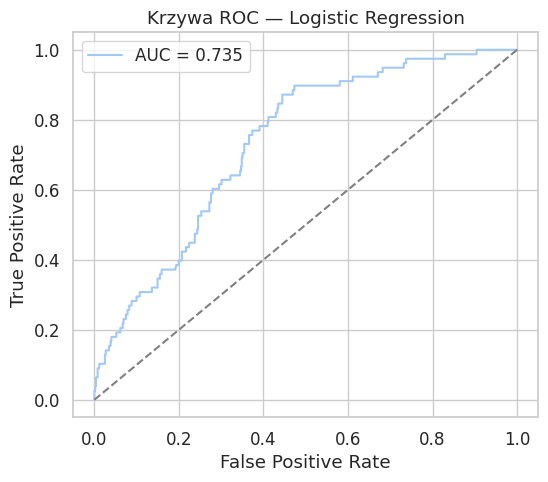

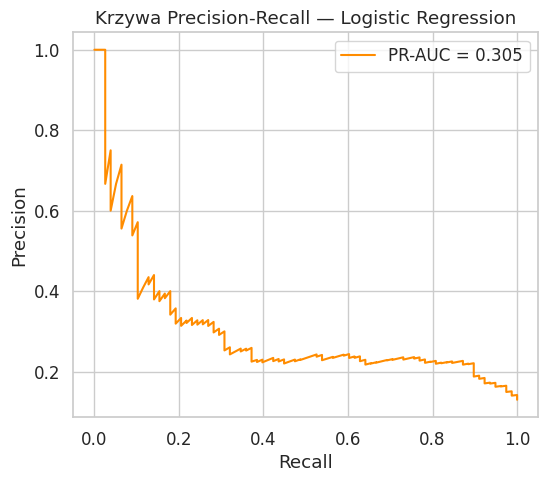

<Figure size 600x500 with 0 Axes>

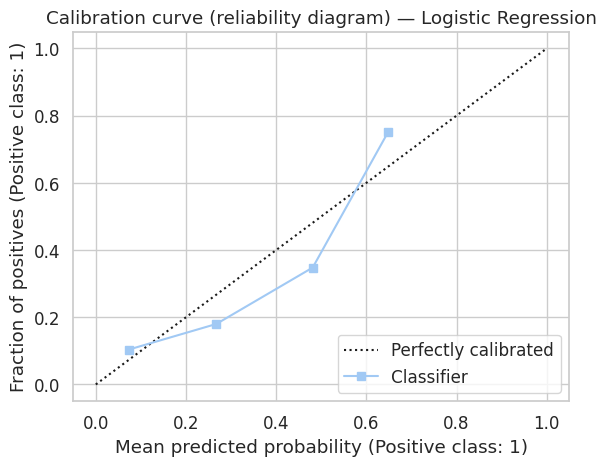

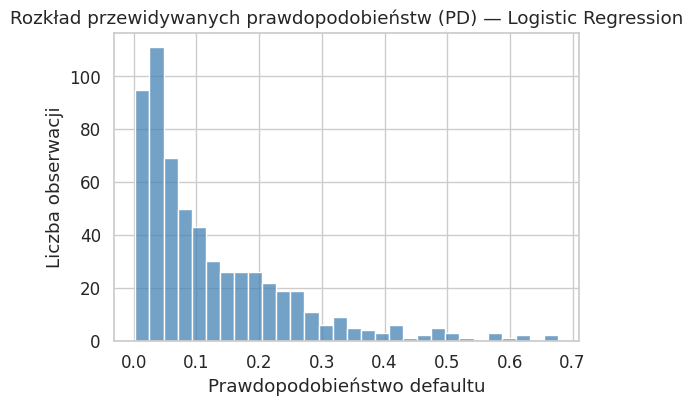

In [29]:
from sklearn.metrics import (
    roc_auc_score, roc_curve, precision_recall_curve,
    average_precision_score, log_loss, brier_score_loss
)
from sklearn.calibration import CalibrationDisplay
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Predykcje na zbiorze testowym
y_pred_proba = model_lr.predict_proba(X_test_std)[:, 1]
y_pred = (y_pred_proba >= 0.5).astype(int)

# Obliczenie metryk jakości
auc = roc_auc_score(y_test, y_pred_proba)
pr_auc = average_precision_score(y_test, y_pred_proba)
logloss = log_loss(y_test, y_pred_proba)
brier = brier_score_loss(y_test, y_pred_proba)

# KS statistic
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
ks = np.max(tpr - fpr)

print("Wyniki metryk jakości (Logistic Regression):")
print(f"   • AUC (ROC)       : {auc:.4f}")
print(f"   • PR-AUC          : {pr_auc:.4f}")
print(f"   • KS statistic    : {ks:.4f}")
print(f"   • Log-loss        : {logloss:.4f}")
print(f"   • Brier score     : {brier:.4f}")

# --- Wykres ROC ---
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"AUC = {auc:.3f}")
plt.plot([0, 1], [0, 1], "--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Krzywa ROC — Logistic Regression")
plt.legend()
plt.show()

# --- Wykres Precision-Recall ---
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)

plt.figure(figsize=(6, 5))
plt.plot(recall, precision, label=f"PR-AUC = {pr_auc:.3f}", color="darkorange")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Krzywa Precision-Recall — Logistic Regression")
plt.legend()
plt.show()

# --- Krzywa kalibracji ---
plt.figure(figsize=(6, 5))
CalibrationDisplay.from_predictions(y_test, y_pred_proba)
plt.title("Calibration curve (reliability diagram) — Logistic Regression")
plt.show()

# --- Histogram predykcji ---
plt.figure(figsize=(6, 4))
sns.histplot(y_pred_proba, bins=30, kde=False, color="steelblue")
plt.title("Rozkład przewidywanych prawdopodobieństw (PD) — Logistic Regression")
plt.xlabel("Prawdopodobieństwo defaultu")
plt.ylabel("Liczba obserwacji")
plt.show()


## 4.4 Wyjaśnialność globalna (SHAP, PDP, ICE)

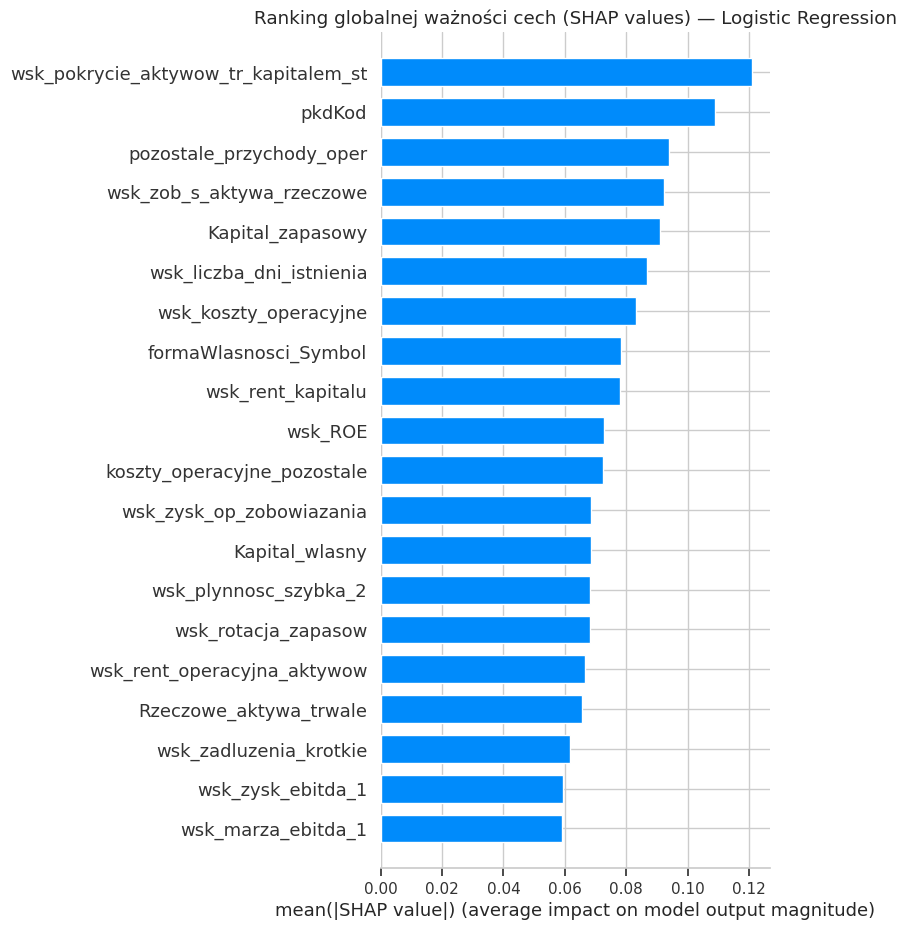

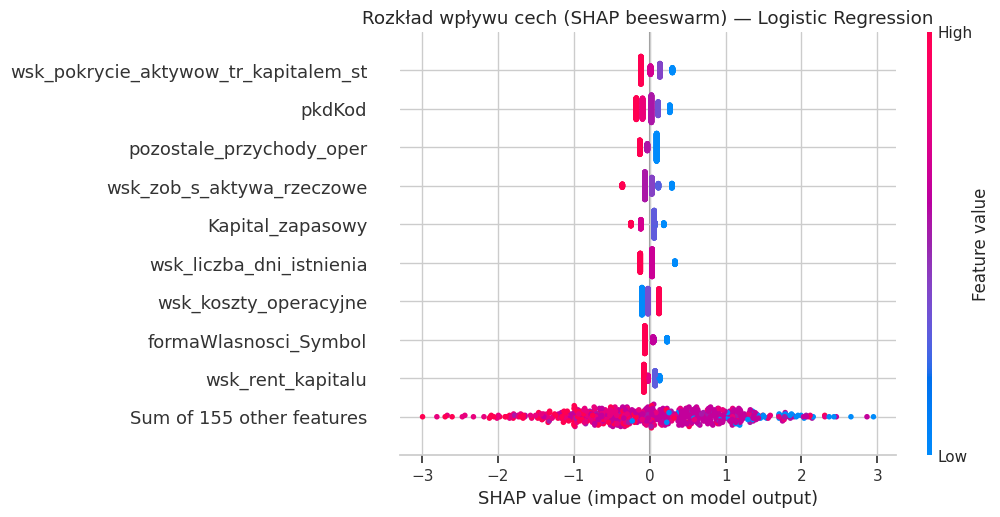

Najważniejsze cechy wg SHAP: ['Kapital_zapasowy', 'wsk_zob_s_aktywa_rzeczowe', 'pozostale_przychody_oper', 'pkdKod', 'wsk_pokrycie_aktywow_tr_kapitalem_st']


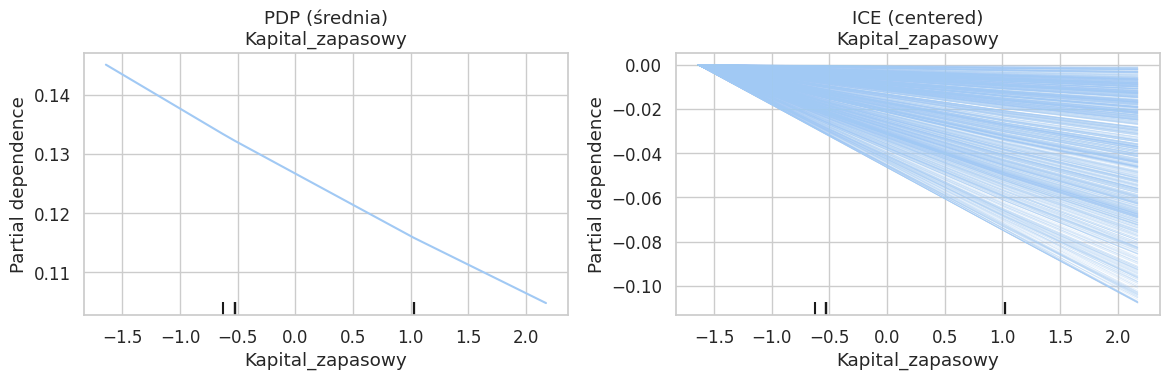

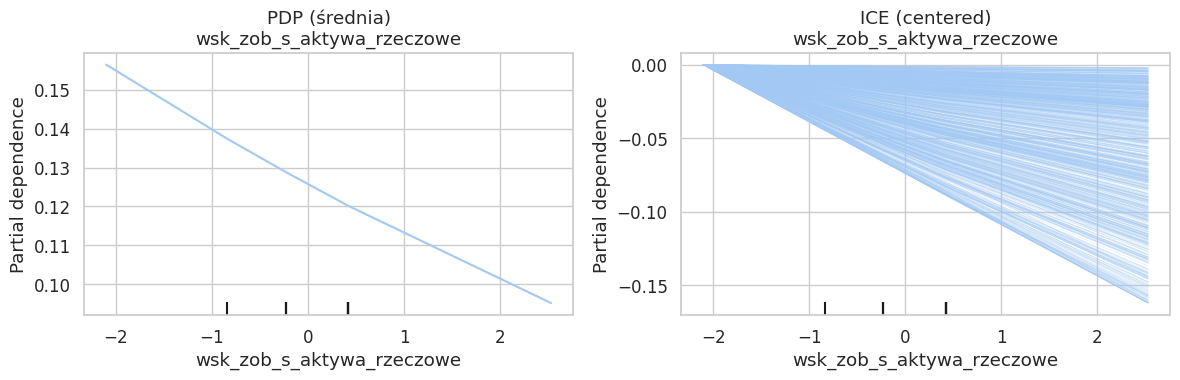

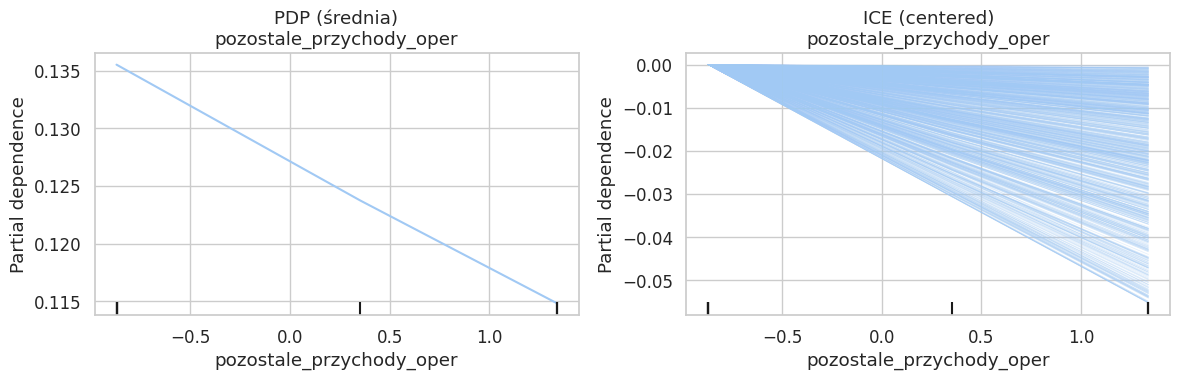

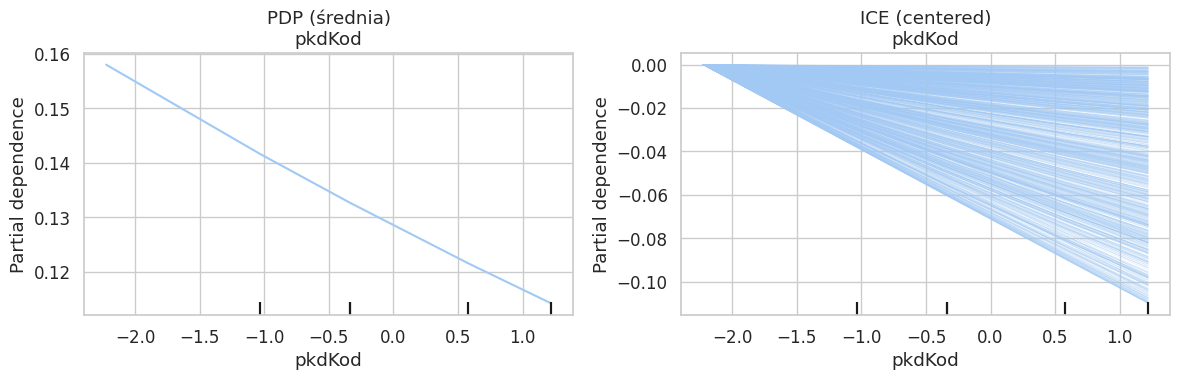

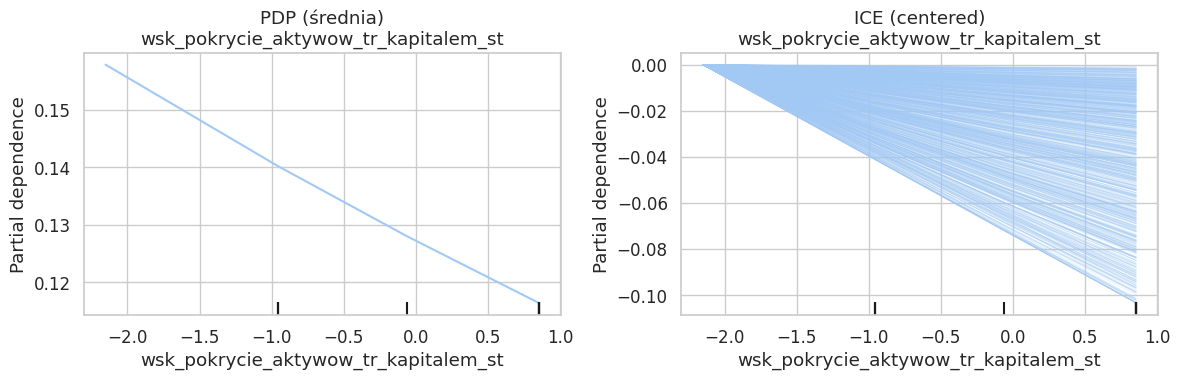

In [30]:
import shap
import matplotlib.pyplot as plt
import numpy as np
from sklearn.inspection import PartialDependenceDisplay

# SHAP — wartości dla modelu regresji logistycznej
explainer = shap.LinearExplainer(model_lr, X_train_std)
shap_values = explainer.shap_values(X_test_std)

# Upewnij się, że SHAP ma nazwy cech
shap_values_expl = shap.Explanation(
    values=shap_values,
    base_values=explainer.expected_value,
    data=X_test_std,
    feature_names=X_train_woe.columns
)

# Ranking globalnej ważności cech
plt.title("Ranking globalnej ważności cech (SHAP values) — Logistic Regression")
shap.summary_plot(shap_values, X_test_std, feature_names=X_train_woe.columns, plot_type="bar")

# Beeswarm — szczegółowy rozkład wpływu cech
plt.title("Rozkład wpływu cech (SHAP beeswarm) — Logistic Regression")
shap.plots.beeswarm(shap_values_expl)

# PDP i ICE dla kilku najważniejszych cech
# Wybranie top 5 cech wg średniej bezwzględnej wartości SHAP
top_features_idx = np.argsort(np.abs(shap_values).mean(axis=0))[-5:]
feature_names = [X_train_woe.columns[i] for i in top_features_idx]

print("Najważniejsze cechy wg SHAP:", feature_names)

# PDP + centered ICE podobnie jak dla XGBoost
for feat in feature_names:
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    PartialDependenceDisplay.from_estimator(
        model_lr,
        X_train_std,
        [feat],
        ax=axes[0],
        kind="average",
        feature_names=X_train_woe.columns
    )
    axes[0].set_title(f"PDP (średnia)\n{feat}")

    PartialDependenceDisplay.from_estimator(
        model_lr,
        X_train_std,
        [feat],
        ax=axes[1],
        kind="individual",
        centered=True,
        feature_names=X_train_woe.columns
    )
    axes[1].set_title(f"ICE (centered)\n{feat}")

    plt.tight_layout()
    plt.show()



## 4.5 Wyjaśnialność lokalna (SHAP, LIME)

Wybrane indeksy przypadków: {'Niskie ryzyko': np.int64(100), 'Średnie ryzyko (borderline)': np.int64(444), 'Wysokie ryzyko': np.int64(141)}

SHAP waterfall — Niskie ryzyko (idx=100, PD=0.242%)


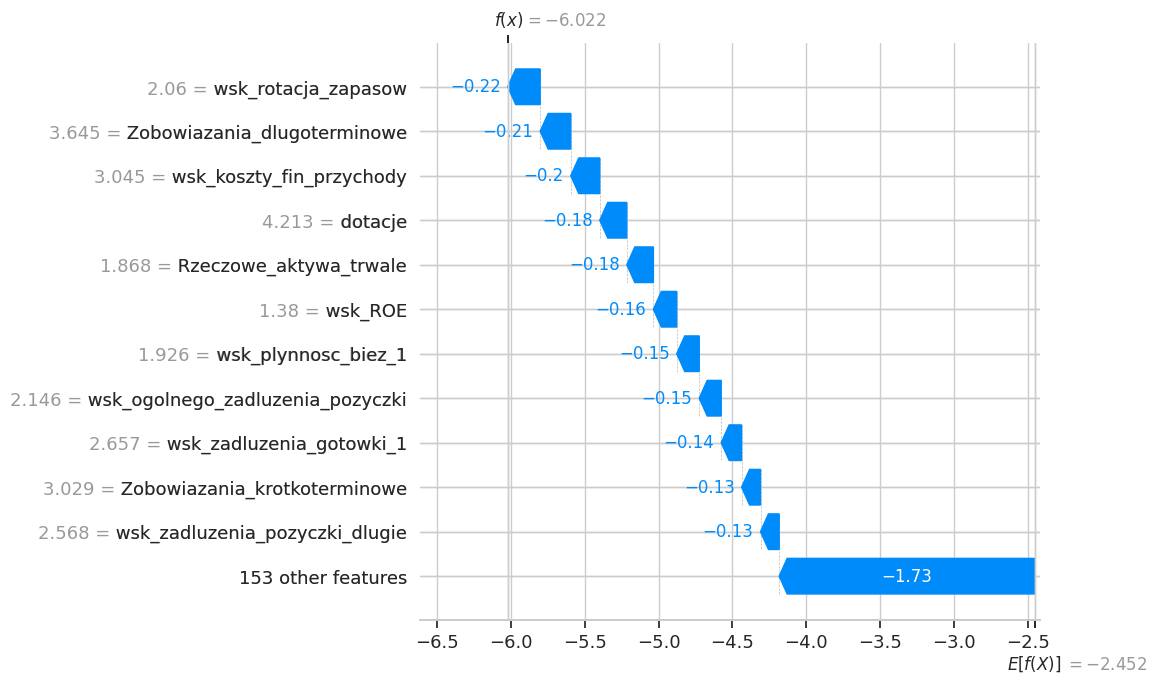


SHAP waterfall — Średnie ryzyko (borderline) (idx=444, PD=50.445%)


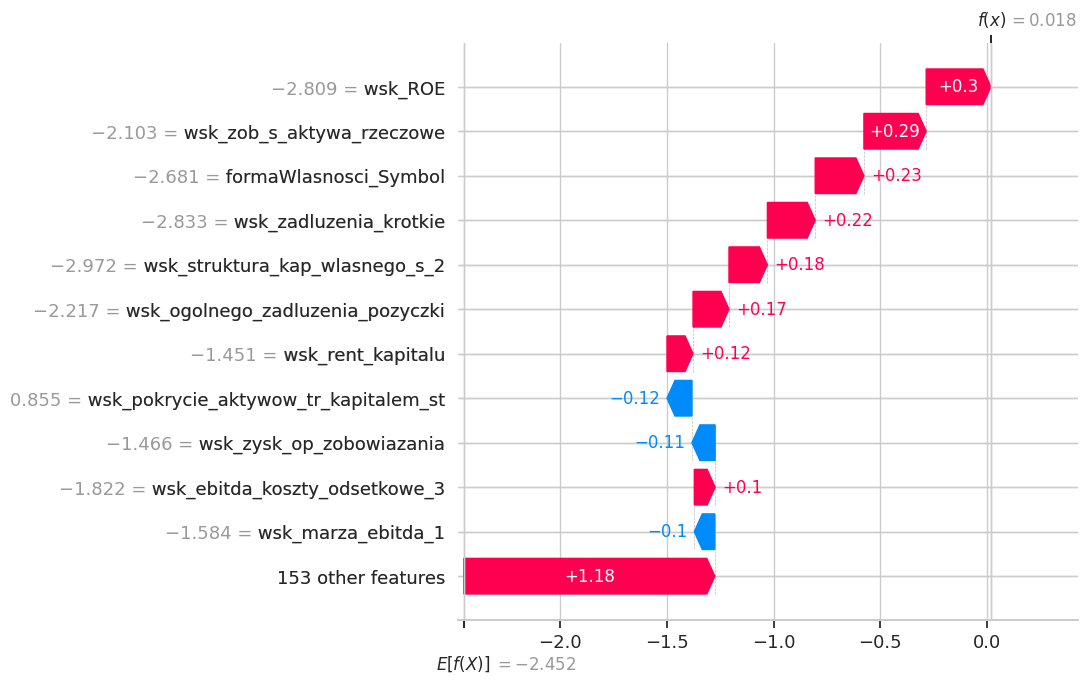


SHAP waterfall — Wysokie ryzyko (idx=141, PD=67.683%)


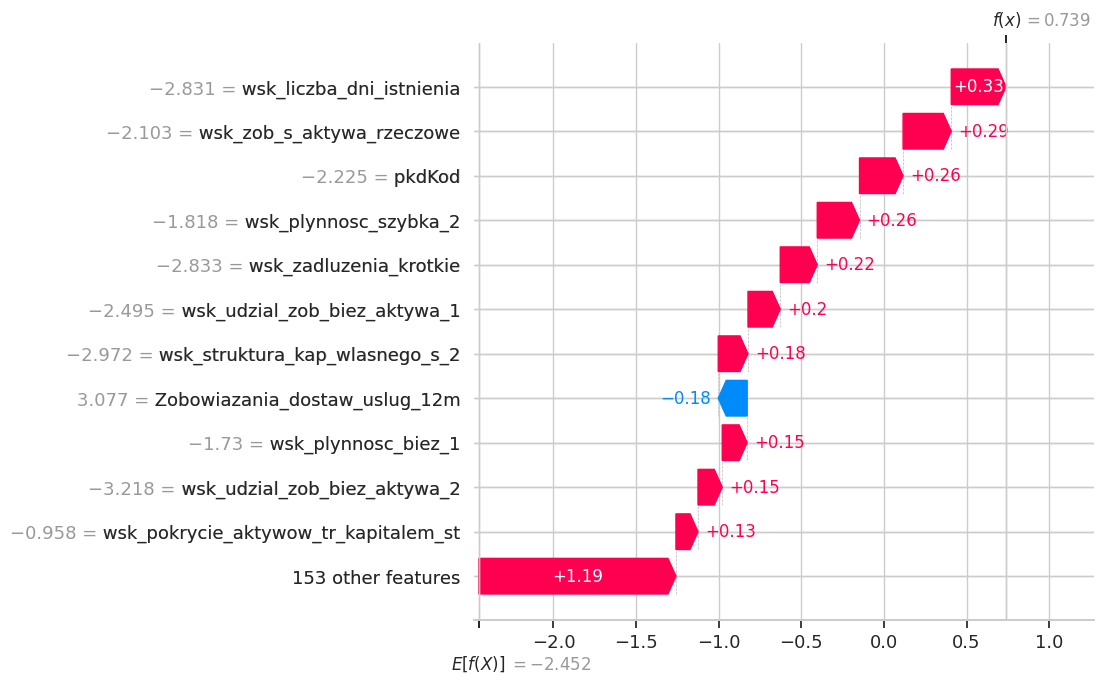


LIME — Niskie ryzyko (idx=100, PD=0.242%)
[('wsk_koszt_długu_1 <= -0.07', 0.05674884880073547), ('wsk_plynnosc_szybka_2 <= 0.12', 0.04018119740865992), ('-0.96 < wsk_pokrycie_aktywow_tr_kapitalem_st <= 0.86', -0.03299837191993162), ('Kredyty_pozyczki <= -0.26', 0.029376909710869807), ('-0.33 < wsk_liczba_dni_istnienia <= 0.96', -0.029320627061178176), ('wsk_ROE > 0.50', -0.02833384804567772), ('Rzeczowe_aktywa_trwale > 0.09', -0.027216883401022327), ('Rozliczenia_miedzyokresowe_dlugie <= -0.29', -0.025501351119427387), ('wsk_koszty_fin_przychody > 0.81', -0.022673948569030822), ('wsk_rotacja_zapasow > 0.01', -0.021430115507771613)]


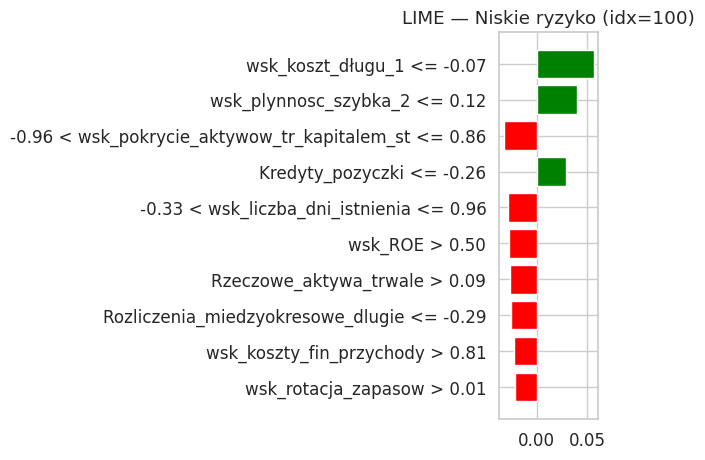


LIME — Średnie ryzyko (borderline) (idx=444, PD=50.445%)
[('wsk_koszt_długu_1 <= -0.07', 0.060319874072094014), ('wsk_plynnosc_szybka_2 <= 0.12', 0.041663198005484806), ('-0.96 < wsk_pokrycie_aktywow_tr_kapitalem_st <= 0.86', -0.03619877351183515), ('Kapital_zapasowy <= -0.53', 0.03159035415907911), ('wsk_zob_s_aktywa_rzeczowe <= -0.23', 0.03103453169404104), ('Kredyty_pozyczki <= -0.26', 0.03072196695352174), ('wsk_liczba_dni_istnienia <= -0.33', 0.030630219041989086), ('wsk_ROE <= -0.17', 0.02519804077615074), ('formaWlasnosci_Symbol <= -0.64', 0.023092274433492183), ('Zobowiazania_dostaw_uslug_12m <= -0.33', 0.019196396974674772)]


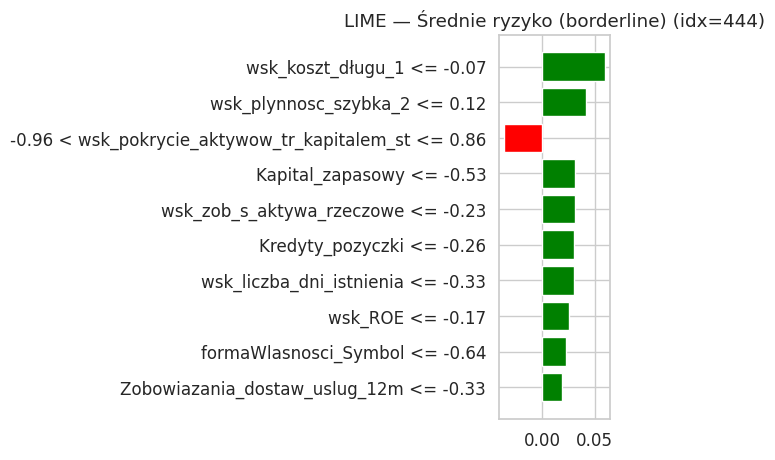


LIME — Wysokie ryzyko (idx=141, PD=67.683%)
[('wsk_koszt_długu_1 <= -0.07', 0.06030139538036384), ('wsk_plynnosc_szybka_2 <= 0.12', 0.039358645335225276), ('wsk_pokrycie_aktywow_tr_kapitalem_st <= -0.96', 0.03607986666318415), ('Kapital_zapasowy <= -0.53', 0.03231400978620616), ('pkdKod <= -0.34', 0.03207346979968249), ('wsk_zob_s_aktywa_rzeczowe <= -0.23', 0.03001550847680133), ('Kredyty_pozyczki <= -0.26', 0.029199386002448726), ('wsk_liczba_dni_istnienia <= -0.33', 0.02843008322473802), ('dotacje <= -0.24', 0.026037829707063934), ('wsk_ROE <= -0.17', 0.02349030414365968)]


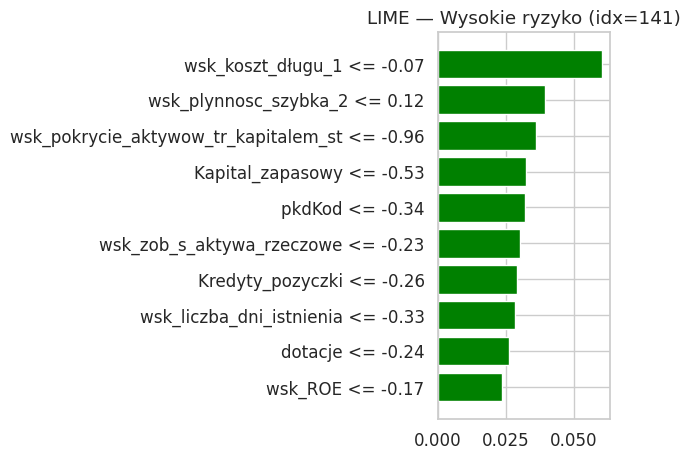

In [31]:
# 4.5 Wyjaśnialność lokalna (SHAP, LIME)

import shap
import numpy as np
from lime.lime_tabular import LimeTabularExplainer
import matplotlib.pyplot as plt

# SHAP — ponowne obliczenie wartości (jeśli nie są w pamięci)
explainer_lr = shap.LinearExplainer(model_lr, X_train_std)
shap_values_test = explainer_lr.shap_values(X_test_std)

shap_expl_test = shap.Explanation(
    values=shap_values_test,
    base_values=explainer_lr.expected_value,
    data=X_test_std,
    feature_names=X_train_woe.columns
)

# Wybór trzech przykładów: niskie, średnie, wysokie PD
p_test = model_lr.predict_proba(X_test_std)[:, 1]

idx_low = np.argmin(p_test)  # najniższe PD
idx_high = np.argmax(p_test)  # najwyższe PD
idx_mid = np.argsort(np.abs(p_test - 0.5))[0]  # najbliżej 0.5

case_indices = {
    "Niskie ryzyko": idx_low,
    "Średnie ryzyko (borderline)": idx_mid,
    "Wysokie ryzyko": idx_high
}

print("Wybrane indeksy przypadków:", case_indices)

# SHAP waterfall dla wybranych obserwacji
for desc, idx in case_indices.items():
    print(f"\nSHAP waterfall — {desc} (idx={idx}, PD={p_test[idx]:.2%})")
    shap.plots.waterfall(shap_expl_test[idx], max_display=12)

# LIME — lokalne wyjaśnienia dla tych samych przypadków
lime_explainer = LimeTabularExplainer(
    training_data=X_train_std,
    feature_names=X_train_woe.columns,
    class_names=["brak defaultu", "default"],
    mode="classification",
    discretize_continuous=True
)

for desc, idx in case_indices.items():
    print(f"\nLIME — {desc} (idx={idx}, PD={p_test[idx]:.3%})")
    exp = lime_explainer.explain_instance(
        X_test_std[idx],
        model_lr.predict_proba,
        num_features=10
    )
    # Tekstowe podsumowanie
    print(exp.as_list())
    # Wykres LIME
    fig = exp.as_pyplot_figure()
    plt.title(f"LIME — {desc} (idx={idx})")
    plt.tight_layout()
    plt.show()


## 4.6 Kalibracja probabilistyczna

=== PRE-CAL — model bazowy ===
{'AUC': 0.7353497396600845, 'LogLoss': 0.3470861533270773, 'Brier': 0.10493978133066417, 'ECE': np.float64(0.04552786257132974)}


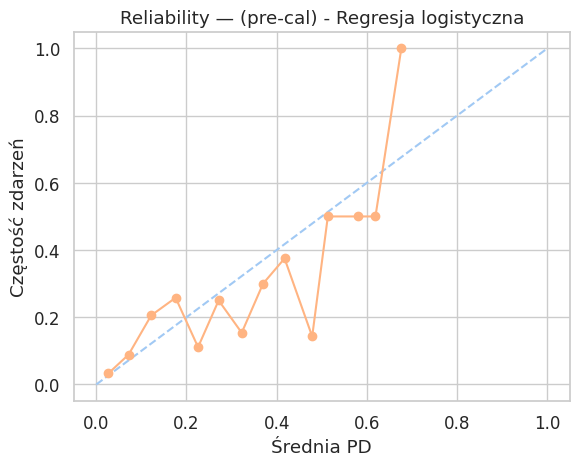

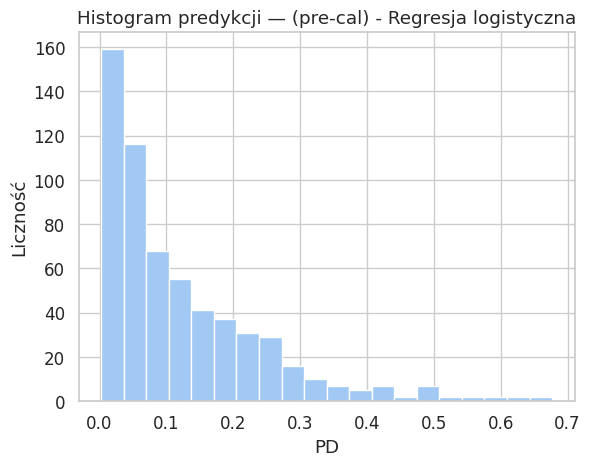

In [39]:
# 4.6 KALIBRACJA PROBABILISTYCZNA
from sklearn.calibration import calibration_curve


# ---- Funkcje pomocnicze ----

def expected_calibration_error(y_true, p, n_bins=20):
    bins = np.linspace(0, 1, n_bins + 1)
    ece = 0.0
    for i in range(n_bins):
        mask = (p >= bins[i]) & (p < bins[i + 1])
        if mask.any():
            acc = y_true[mask].mean()
            conf = p[mask].mean()
            ece += (mask.sum() / len(p)) * abs(acc - conf)
    return ece


def reliability_plot(y_true, p, title):
    frac_pos, mean_pred = calibration_curve(y_true, p, n_bins=20)
    plt.figure()
    plt.plot([0, 1], [0, 1], '--')
    plt.plot(mean_pred, frac_pos, marker='o')
    plt.xlabel("Średnia PD")
    plt.ylabel("Częstość zdarzeń")
    plt.title(title)
    plt.show()


def hist_predictions(p, title):
    plt.figure()
    plt.hist(p, bins=20)
    plt.title(title)
    plt.xlabel("PD")
    plt.ylabel("Liczność")
    plt.show()


def basic_metrics(y, p):
    return {
        "AUC": roc_auc_score(y, p),
        "LogLoss": log_loss(y, p),
        "Brier": brier_score_loss(y, p),
        "ECE": expected_calibration_error(y, p)
    }


# PRE-CAL DIAGNOSTYKA (test)

p_test_base = model_lr.predict_proba(X_test_std)[:, 1]

print("=== PRE-CAL — model bazowy ===")
print(basic_metrics(y_test, p_test_base))

reliability_plot(y_test, p_test_base, "Reliability — (pre-cal) - Regresja logistyczna")
hist_predictions(p_test_base, "Histogram predykcji — (pre-cal) - Regresja logistyczna")


Platt (test): {'AUC': 0.7353497396600845, 'LogLoss': 0.37797004309741455, 'Brier': 0.11119866471421361, 'ECE': np.float64(0.04873211641174092)}


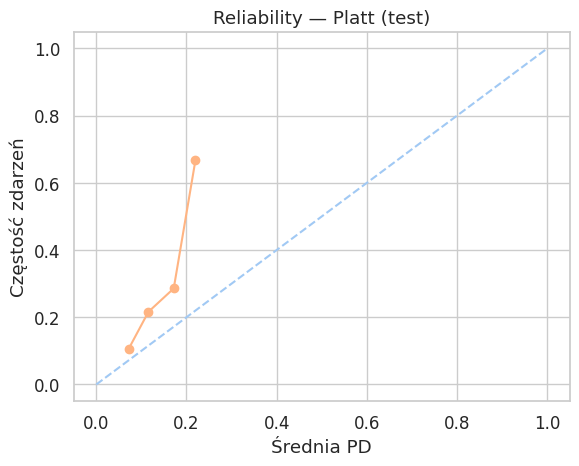

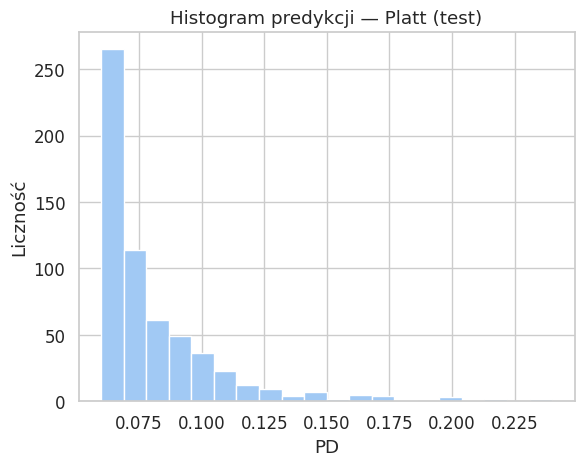

ECE: 0.04873211641174092


In [33]:
# Platt scaling

from sklearn.linear_model import LogisticRegression

def fit_platt(y, p):
    lr = LogisticRegression(solver='lbfgs', random_state=SEED)
    lr.fit(p.reshape(-1, 1), y)
    return lr


def apply_platt(model, p):
    return model.predict_proba(p.reshape(-1, 1))[:, 1]


# --- Predykcje na zbiorze walidacyjnym ---
p_valid_base = model_lr.predict_proba(X_val_std)[:, 1]

# --- Fit Platt na WALIDACJI ---
platt_model = fit_platt(y_val, p_valid_base)

# --- Zastosowanie Platt na TEŚCIE ---
p_test_platt = apply_platt(platt_model, p_test_base)

print("Platt (test):", basic_metrics(y_test, p_test_platt))
reliability_plot(y_test, p_test_platt, "Reliability — Platt (test) - Regresja logistyczna")
hist_predictions(p_test_platt, "Histogram predykcji — Platt (test) - Regresja logistyczna")
print("ECE:", expected_calibration_error(y_test, p_test_platt))


In [34]:
# Calibration-in-the-large do PD = 4%

def logit(p):
    eps = 1e-12
    p = np.clip(p, eps, 1 - eps)
    return np.log(p / (1 - p))


def inv_logit(z):
    return 1 / (1 + np.exp(-z))


def citl_shift(p, target_mean=0.04):
    z = logit(p)
    lo, hi = -10, 10
    for _ in range(100):
        mid = (lo + hi) / 2
        m = inv_logit(z + mid).mean()
        if m < target_mean:
            lo = mid
        else:
            hi = mid
    return inv_logit(z + mid)


p_test_platt_4 = citl_shift(p_test_platt, target_mean=0.04)

print("Średnia PD po CITL (cel 0.04):", p_test_platt_4.mean())


Średnia PD po CITL (cel 0.04): 0.04



=== Base ===
{'AUC': 0.752210433244916, 'LogLoss': 0.3351074969161967, 'Brier': 0.0998425532768332, 'ECE': np.float64(0.03439324095224341)}

=== Platt ===
{'AUC': 0.7353497396600845, 'LogLoss': 0.37797004309741455, 'Brier': 0.11119866471421361, 'ECE': np.float64(0.04873211641174092)}

=== Platt + CITL 4% ===
{'AUC': 0.7353497396600845, 'LogLoss': 0.43228654313882203, 'Brier': 0.11874530226356976, 'ECE': np.float64(0.09)}

=== Base ===


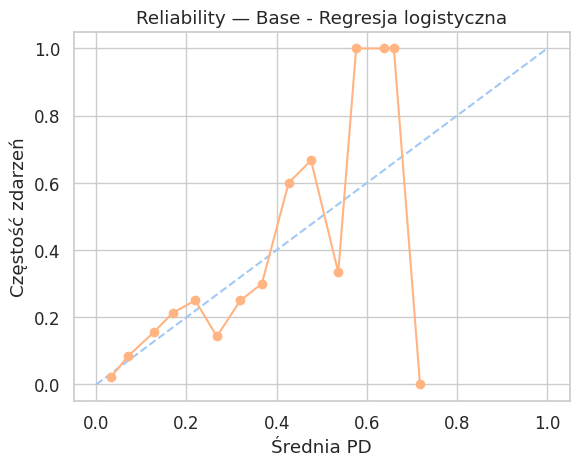

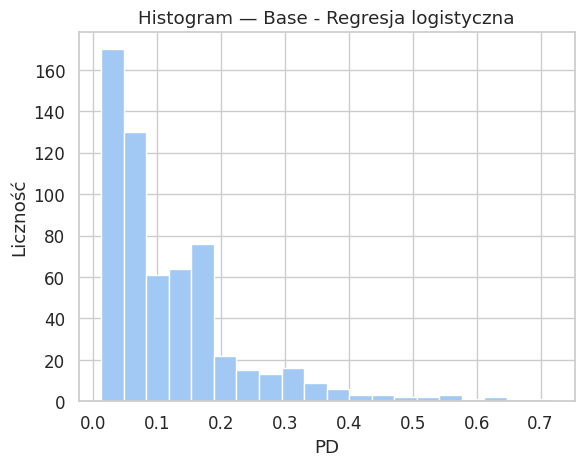


=== Platt ===


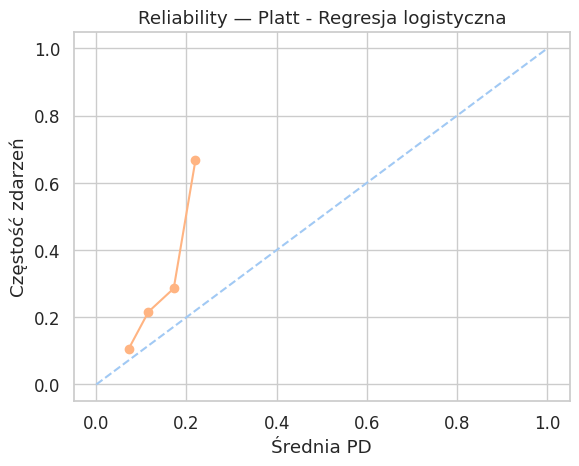

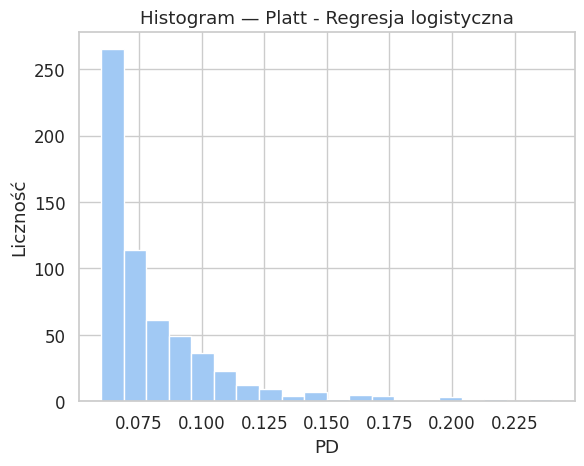


=== Platt + CITL 4% ===


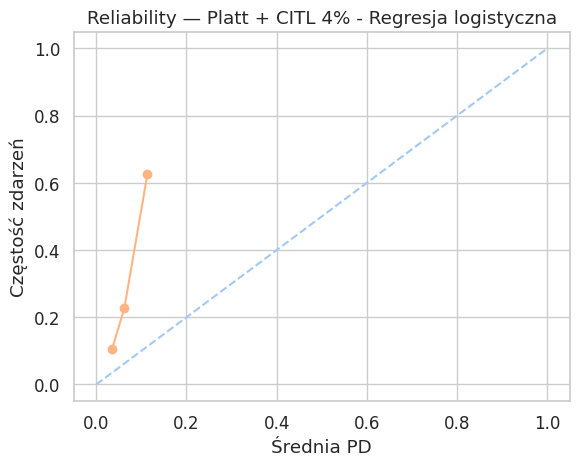

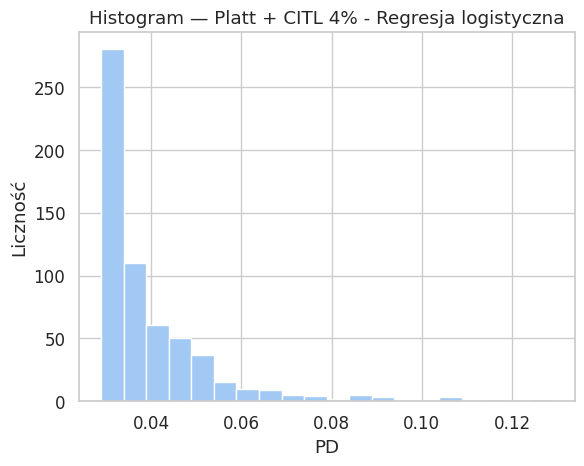

In [53]:
# Porównanie różnych wariantów kalibracji

models = {
    "Base": p_test_base,
    "Platt": p_test_platt,
    "Platt + CITL 4%": p_test_platt_4
}

for name, p in models.items():
    print(f"\n=== {name} ===")
    print(basic_metrics(y_test, p))

for name, p in models.items():
    print(f"\n=== {name} ===")
    reliability_plot(y_test, p, f"Reliability — {name} - Regresja logistyczna")
    hist_predictions(p, f"Histogram — {name} - Regresja logistyczna")


## 4.7 Progi decyzyjne i ratingi

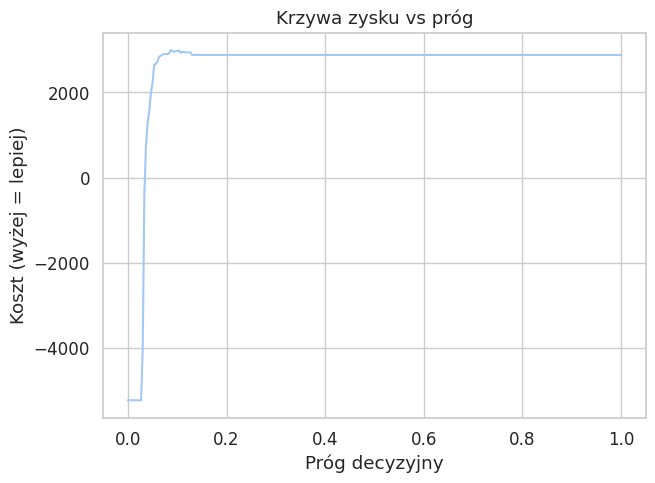

=== Najlepszy próg - Regresja logistyczna ===
Próg: 0.08666666666666667
TP, FP, FN, TN: 7 5 71 517
Stopa akceptacji: 0.02
Maksymalny zysk: 2990


In [54]:
# 4.7 PROGI DECYZYJNE I RATINGI

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# FUNKCJE KOSZTÓW I PRZEGLĄD PROGÓW

# Możesz zmieniać koszty w zależności od profilu ryzyka
COST_TP = 0  # zysk z odrzucenia złego klienta (oszczędzona strata)
COST_FP = -10  # koszt odrzucenia dobrego klienta (utracony zysk)
COST_FN = -30  # koszt przepuszczenia złego
COST_TN = +10  # zysk z dobrego klienta


def cost_for_threshold(y_true, p, thr):
    yhat = (p >= thr).astype(int)
    tp = np.sum((yhat == 1) & (y_true == 1))
    fp = np.sum((yhat == 1) & (y_true == 0))
    fn = np.sum((yhat == 0) & (y_true == 1))
    tn = np.sum((yhat == 0) & (y_true == 0))
    total_cost = tp * COST_TP + fp * COST_FP + fn * COST_FN + tn * COST_TN
    return total_cost, tp, fp, fn, tn


def sweep_costs(y_true, p, n=301):
    thrs = np.linspace(0, 1, n)
    costs = []
    details = []
    for t in thrs:
        c, tp, fp, fn, tn = cost_for_threshold(y_true, p, t)
        costs.append(c)
        details.append((tp, fp, fn, tn))
    return thrs, np.array(costs), details


# WYZNACZENIE NAJLEPSZEGO PROGU

thrs, costs, details = sweep_costs(y_test, p_test_platt_4, n=301)

best_idx = int(np.argmax(costs))
best_thr = float(thrs[best_idx])
best_tp, best_fp, best_fn, best_tn = details[best_idx]

# Wykres cost curve
plt.figure(figsize=(7, 5))
plt.plot(thrs, costs)
plt.title("Krzywa zysku vs próg")
plt.xlabel("Próg decyzyjny")
plt.ylabel("Koszt (wyżej = lepiej)")
plt.grid(True)
plt.show()

# Wyniki
print("=== Najlepszy próg - Regresja logistyczna ===")
print("Próg:", best_thr)
print("TP, FP, FN, TN:", best_tp, best_fp, best_fn, best_tn)
accept_rate = (best_tp + best_fp) / len(y_test)
print("Stopa akceptacji:", round(accept_rate, 4))
print("Maksymalny zysk:", costs[best_idx])


In [37]:
# MAPOWANIE PD → RATING (AAA — D)

# Domyślne progi ratingów
rating_bins = [
    0.000,  # AAA
    0.001,  # AA
    0.005,  # A
    0.020,  # BBB
    0.050,  # BB
    0.100,  # B
    0.200,  # CCC
    1.001
]

rating_labels = ["AAA", "AA", "A", "BBB", "BB", "B", "CCC"]


def pd_to_rating(p):
    return pd.cut(
        p,
        bins=rating_bins,
        labels=rating_labels,
        right=False,
        include_lowest=True
    )


ratings = pd_to_rating(p_test_platt_4)

print("\n=== Liczba obserwacji w ratingach ===")
display(pd.crosstab(ratings, columns="count"))



=== Liczba obserwacji w ratingach ===


col_0  count
row_0       
BBB      508
BB        84
B          8


=== Średnie PD per rating ===


PD
rating          
AAA          NaN
AA           NaN
A            NaN
BBB     0.035204
BB      0.062027
B       0.113269
CCC          NaN

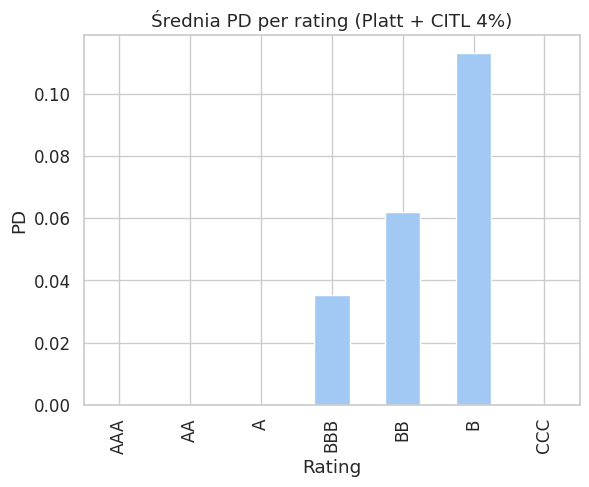

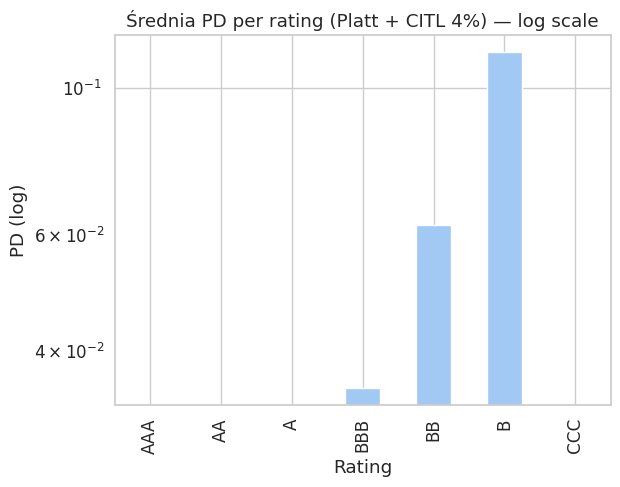

In [38]:
# ŚREDNIE PD PER RATING

mean_pd = (
    pd.DataFrame({"PD": p_test_platt_4})
    .assign(rating=ratings)
    .groupby("rating")
    .mean()
)

print("\n=== Średnie PD per rating ===")
display(mean_pd)

# Wykres zwykły
mean_pd.plot(kind="bar", legend=False)
plt.title("Średnia PD per rating (Platt + CITL 4%)")
plt.ylabel("PD")
plt.xlabel("Rating")
plt.show()

# Wykres logarytmiczny
ax = mean_pd.plot(kind="bar", legend=False)
ax.set_yscale("log")
plt.title("Średnia PD per rating (Platt + CITL 4%) — log scale")
plt.ylabel("PD (log)")
plt.xlabel("Rating")
plt.show()


# 5. XGBosst

## 5.1 Przygotowanie danych dla XGBoost

In [21]:
X_xgb = X.copy()
y_xgb = y.copy()

# One-hot encoding (XGBoost wymaga danych liczbowych)
X_xgb = pd.get_dummies(X_xgb, columns=cat_cols, drop_first=True)

# Podział danych na train/test
from sklearn.model_selection import train_test_split

X_train_xgb, X_temp_xgb, y_train_xgb, y_temp_xgb = train_test_split(
    X_xgb, y_xgb,
    test_size=0.40,
    random_state=SEED,
    stratify=y_xgb
)

X_valid_xgb, X_test_xgb, y_valid_xgb, y_test_xgb = train_test_split(
    X_temp_xgb, y_temp_xgb,
    test_size=0.50,
    random_state=SEED,
    stratify=y_temp_xgb
)

print("Zbiory po podziale:")
print(f"   X_train_xgb: {X_train_xgb.shape}")
print(f"   X_valid_xgb: {X_valid_xgb.shape}")
print(f"   X_test_xgb : {X_test_xgb.shape}")
print(f"   y_train_xgb: {y_train_xgb.shape}")
print(f"   y_valid_xgb: {y_valid_xgb.shape}")
print(f"   y_test_xgb : {y_test_xgb.shape}\n")

# # 3) Kontrola braków danych
# missing_train = X_train_xgb.isna().sum().sum()
# missing_valid = X_valid_xgb.isna().sum().sum()
# missing_test = X_test_xgb.isna().sum().sum()
#
# if missing_train == 0 and missing_valid == 0 and missing_test == 0:
#     print("Brak wartości NaN w zbiorach treningowym, walidacyjnym i testowym.")
# else:
#     print(f"⚠Uwaga: występują braki danych "
#           f"(train={missing_train}, valid={missing_valid}, test={missing_test})")
#
# # 4) Wstępna diagnostyka
# print("\nPodsumowanie danych po przygotowaniu:")
# print(f"Liczba cech numerycznych (oryginalnych): {len(num_cols)}")
# print(f"Liczba cech kategorycznych (po one-hot): "
#       f"{len([c for c in X_xgb.columns if any(cc in c for cc in cat_cols)])}")
# print(f"Łączna liczba cech dla modelu XGBoost: {X_xgb.shape[1]}")


Zbiory po podziale:
   X_train_xgb: (1800, 241)
   X_valid_xgb: (600, 241)
   X_test_xgb : (600, 241)
   y_train_xgb: (1800,)
   y_valid_xgb: (600,)
   y_test_xgb : (600,)



## 5.2 Trening i strojenie modelu XGBoost

In [22]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_auc_score
import time

# Definicja bazowego modelu
xgb_base = XGBClassifier(
    objective="binary:logistic",
    eval_metric="logloss",
    use_label_encoder=False,
    random_state=SEED,
    n_jobs=-1,
    verbosity=0,
    # early_stopping_rounds=30
)

# Siatka hiperparametrów do przeszukania
param_grid = {
    "n_estimators": [200, 300, 500, 700],
    "max_depth": [3, 4, 5, 6],
    "learning_rate": [0.01, 0.05, 0.1],
    "subsample": [0.8, 1.0],
    "colsample_bytree": [0.8, 1.0],
    "min_child_weight": [1, 3, 5],
    "gamma": [0, 0.1, 0.2]
}

# RandomizedSearchCV — szybkie przeszukiwanie
search = RandomizedSearchCV(
    estimator=xgb_base,
    param_distributions=param_grid,
    n_iter=20,
    scoring="roc_auc",
    cv=3,
    verbose=1,
    random_state=SEED,
    n_jobs=-1
)

# Trening modelu ze strojonymi parametrami
start = time.time()
search.fit(
    X_train_xgb,
    y_train_xgb,
    eval_set=[(X_valid_xgb, y_valid_xgb)],
    verbose=False
)
end = time.time()

best_model = search.best_estimator_

print(f"Zakończono trening w {end - start:.1f} sek.")
print(f"Najlepszy wynik AUC (walidacja): {search.best_score_:.4f}")
print("Najlepsze parametry XGBoost:")
for k, v in search.best_params_.items():
    print(f"   • {k:<18} = {v}")

# 5️⃣ Ocena modelu na zbiorze testowym
y_pred_proba = best_model.predict_proba(X_test_xgb)[:, 1]
auc_test = roc_auc_score(y_test_xgb, y_pred_proba)

print(f"\nWynik AUC na zbiorze testowym: {auc_test:.4f}")


Fitting 3 folds for each of 20 candidates, totalling 60 fits
Zakończono trening w 96.7 sek.
Najlepszy wynik AUC (walidacja): 0.7401
Najlepsze parametry XGBoost:
   • subsample          = 0.8
   • n_estimators       = 500
   • min_child_weight   = 5
   • max_depth          = 3
   • learning_rate      = 0.01
   • gamma              = 0.1
   • colsample_bytree   = 1.0

Wynik AUC na zbiorze testowym: 0.7522


## 5.3 Ewaluacja jakości modelu

Wyniki metryk jakości:
   • AUC (ROC)       : 0.7522
   • PR-AUC          : 0.3585
   • KS statistic    : 0.3970
   • Log-loss        : 0.3351
   • Brier score     : 0.0998


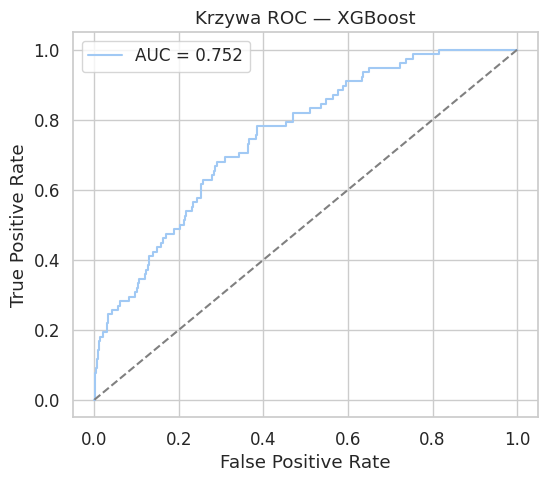

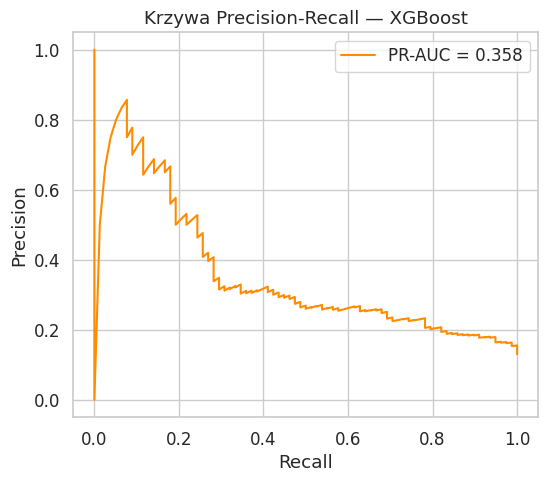

<Figure size 600x500 with 0 Axes>

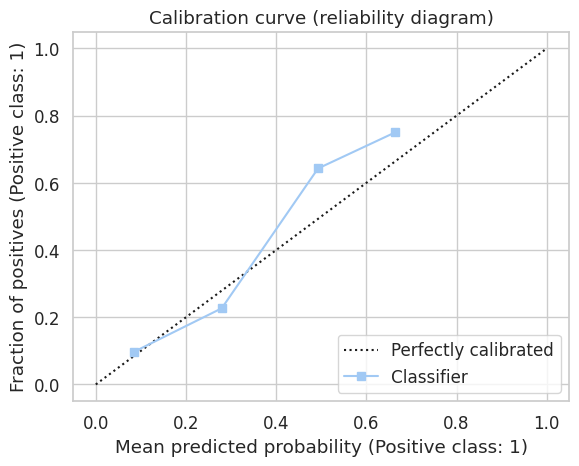

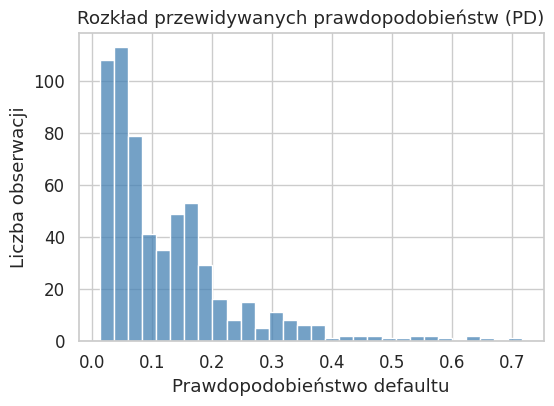

In [23]:
from sklearn.metrics import (
    roc_auc_score, roc_curve, precision_recall_curve,
    average_precision_score, log_loss, brier_score_loss
)
from sklearn.calibration import CalibrationDisplay
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Predykcje na zbiorze testowym
y_pred_proba = best_model.predict_proba(X_test_xgb)[:, 1]
y_pred = (y_pred_proba >= 0.5).astype(int)

# Obliczenie metryk jakości
auc = roc_auc_score(y_test_xgb, y_pred_proba)
pr_auc = average_precision_score(y_test_xgb, y_pred_proba)
logloss = log_loss(y_test_xgb, y_pred_proba)
brier = brier_score_loss(y_test_xgb, y_pred_proba)

# KS statistic (max różnica między TPR a FPR)
fpr, tpr, _ = roc_curve(y_test_xgb, y_pred_proba)
ks = np.max(tpr - fpr)

print("Wyniki metryk jakości:")
print(f"   • AUC (ROC)       : {auc:.4f}")
print(f"   • PR-AUC          : {pr_auc:.4f}")
print(f"   • KS statistic    : {ks:.4f}")
print(f"   • Log-loss        : {logloss:.4f}")
print(f"   • Brier score     : {brier:.4f}")

# Wykres ROC
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"AUC = {auc:.3f}")
plt.plot([0, 1], [0, 1], "--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Krzywa ROC — XGBoost")
plt.legend()
plt.show()

# Wykres Precision-Recall
precision, recall, _ = precision_recall_curve(y_test_xgb, y_pred_proba)
plt.figure(figsize=(6, 5))
plt.plot(recall, precision, label=f"PR-AUC = {pr_auc:.3f}", color="darkorange")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Krzywa Precision-Recall — XGBoost")
plt.legend()
plt.show()

# Krzywa kalibracji (reliability curve)
plt.figure(figsize=(6, 5))
CalibrationDisplay.from_predictions(y_test_xgb, y_pred_proba)
plt.title("Calibration curve (reliability diagram)")
plt.show()

# Histogram rozkładu predykcji
plt.figure(figsize=(6, 4))
sns.histplot(y_pred_proba, bins=30, kde=False, color="steelblue")
plt.title("Rozkład przewidywanych prawdopodobieństw (PD)")
plt.xlabel("Prawdopodobieństwo defaultu")
plt.ylabel("Liczba obserwacji")
plt.show()


## 5.4 Wyjaśnialność globalna (SHAP, PDP, ICE)

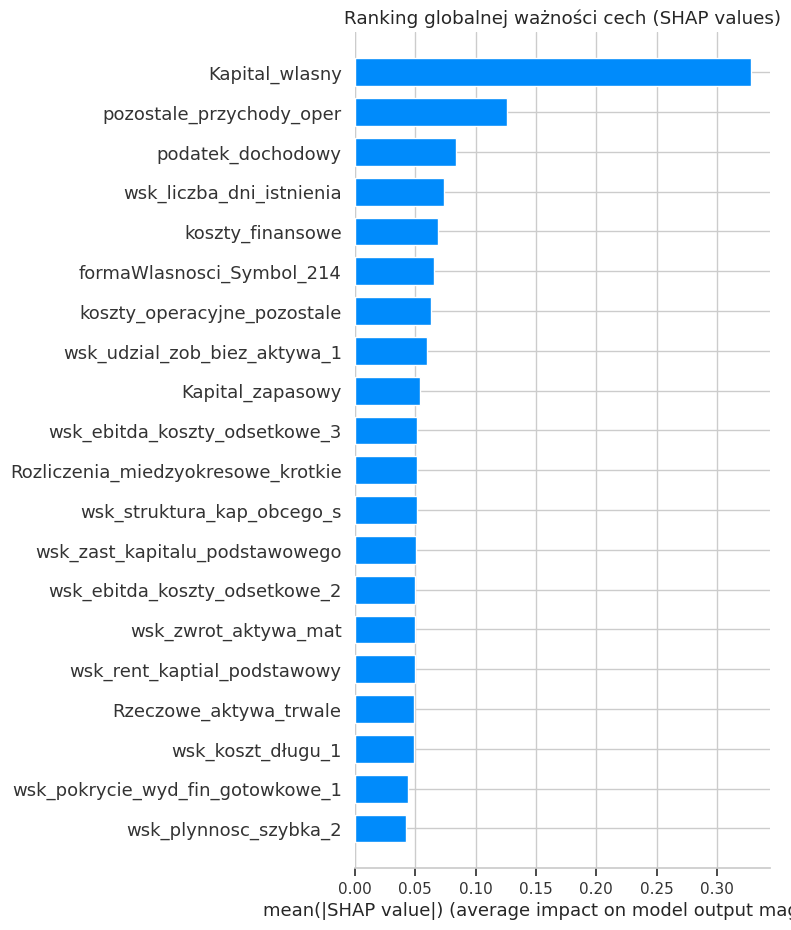

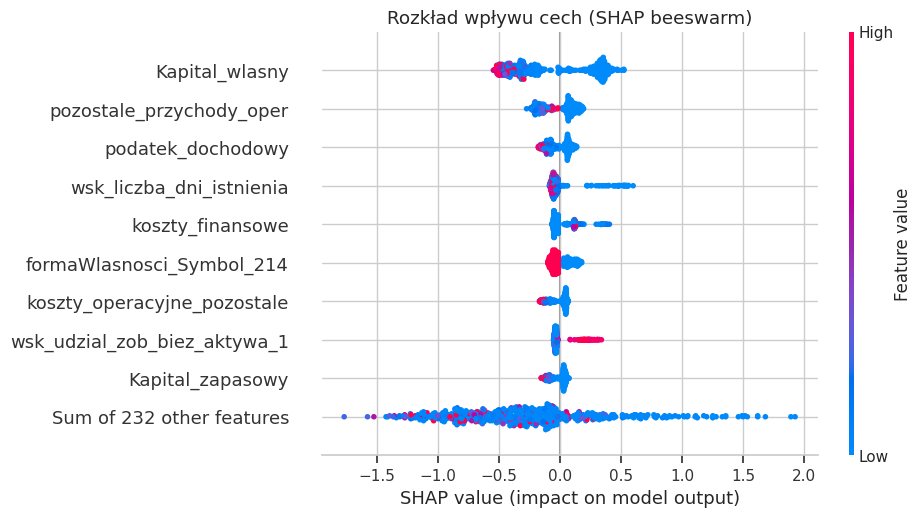

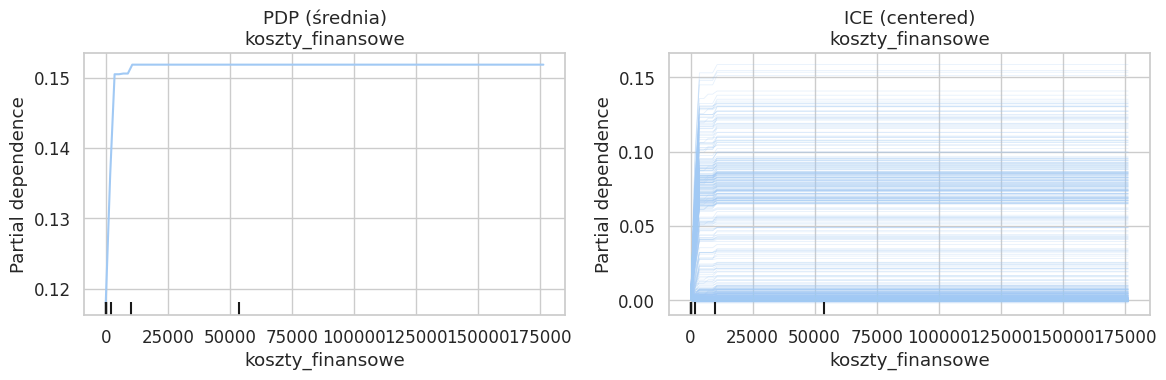

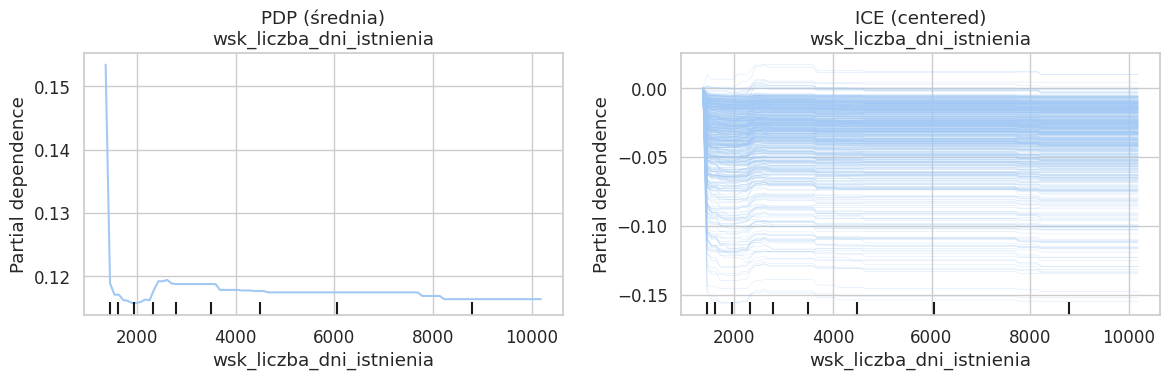

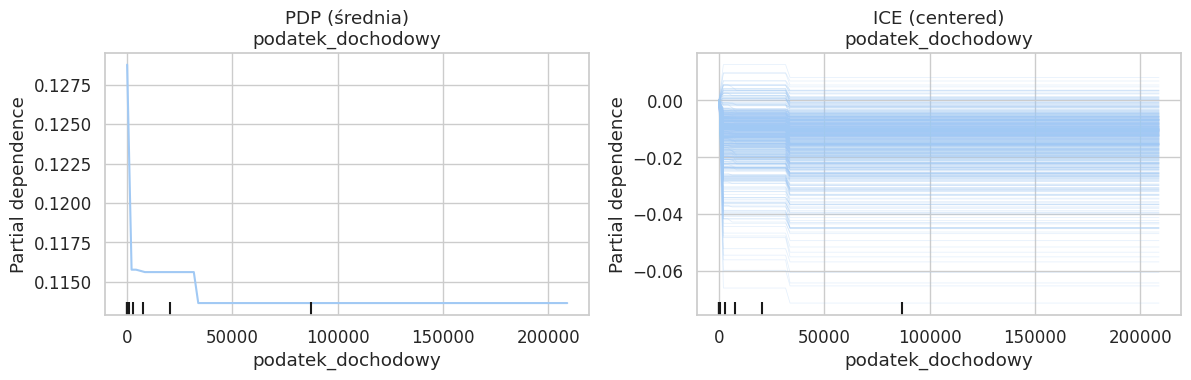

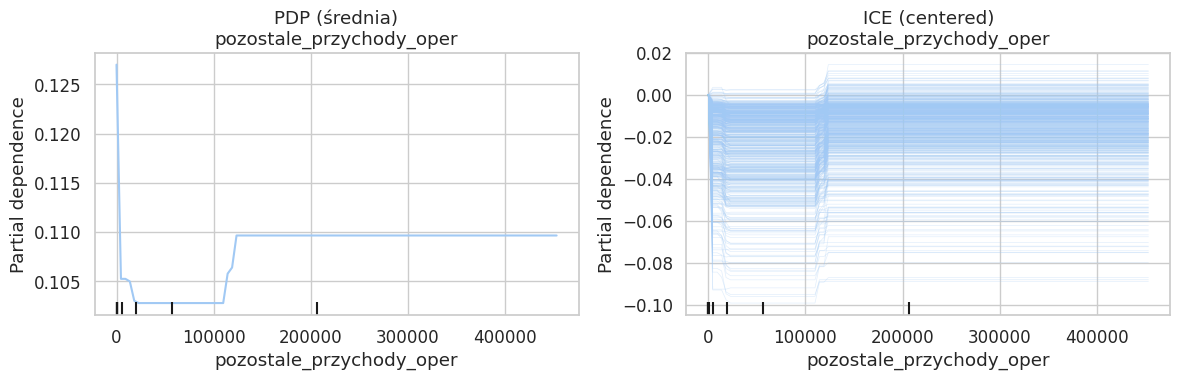

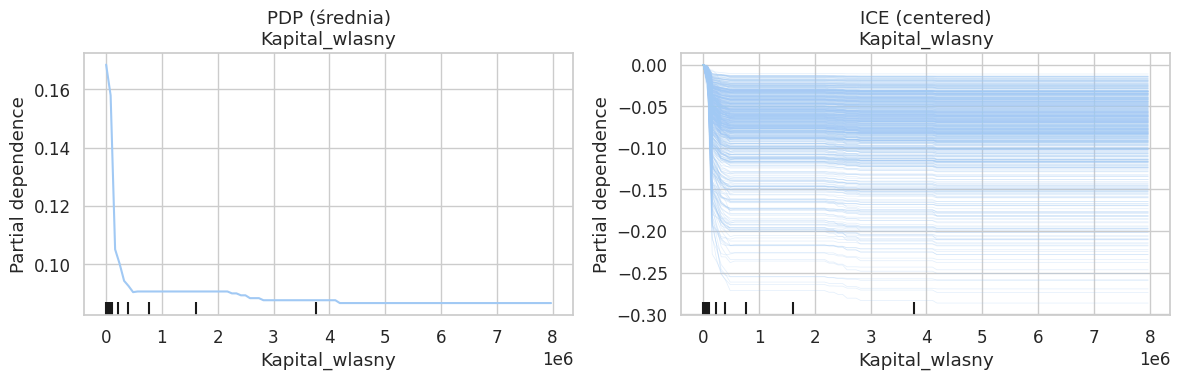

In [24]:
import shap
import matplotlib.pyplot as plt
import numpy as np
from sklearn.inspection import PartialDependenceDisplay

# SHAP — wartości dla modelu XGBoost
explainer = shap.TreeExplainer(best_model)
shap_values = explainer.shap_values(X_test_xgb)
shap_values_2 = explainer(X_test_xgb)

# Ranking globalnej ważności cech
plt.title("Ranking globalnej ważności cech (SHAP values)")
shap.summary_plot(shap_values, X_test_xgb, plot_type="bar")

# Beeswarm — rozkład wpływu cech
plt.title("Rozkład wpływu cech (SHAP beeswarm)")
shap.plots.beeswarm(shap.Explanation(values=shap_values,
                                     base_values=explainer.expected_value,
                                     data=X_test_xgb,
                                     feature_names=X_test_xgb.columns))

# PDP i ICE dla kilku najważniejszych cech
top_features = np.argsort(np.abs(shap_values).mean(0))[-5:]  # top 5 cech
feature_names = X_test_xgb.columns[top_features]

# for feat in feature_names:
#     fig, ax = plt.subplots(figsize=(6, 4))
#     PartialDependenceDisplay.from_estimator(best_model, X_test_xgb, [feat], ax=ax, kind="both")
#     plt.title(f"PDP + ICE dla cechy: {feat}")
#     plt.show()


for feat in feature_names:
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    # --- PDP ---
    PartialDependenceDisplay.from_estimator(
        best_model,
        X_test_xgb,
        [feat],
        ax=axes[0],
        kind="average"
    )
    axes[0].set_title(f"PDP (średnia)\n{feat}")

    # --- ICE (centered) ---
    PartialDependenceDisplay.from_estimator(
        best_model,
        X_test_xgb,
        [feat],
        ax=axes[1],
        kind="individual",
        centered=True
    )
    axes[1].set_title(f"ICE (centered)\n{feat}")

    plt.tight_layout()
    plt.show()


## 5.5 Wyjaśnialność lokalna (SHAP, LIME)


Niski PD (bezpieczny) — obserwacja 338
Prawdopodobieństwo defaultu: 1.25%


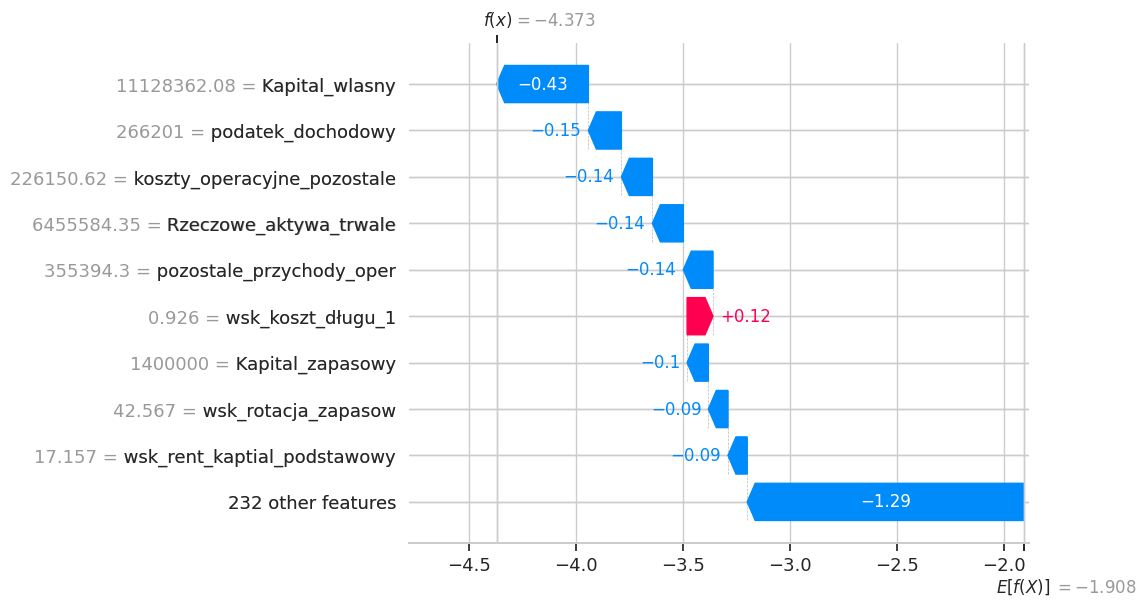


Graniczny przypadek — obserwacja 278
Prawdopodobieństwo defaultu: 48.57%


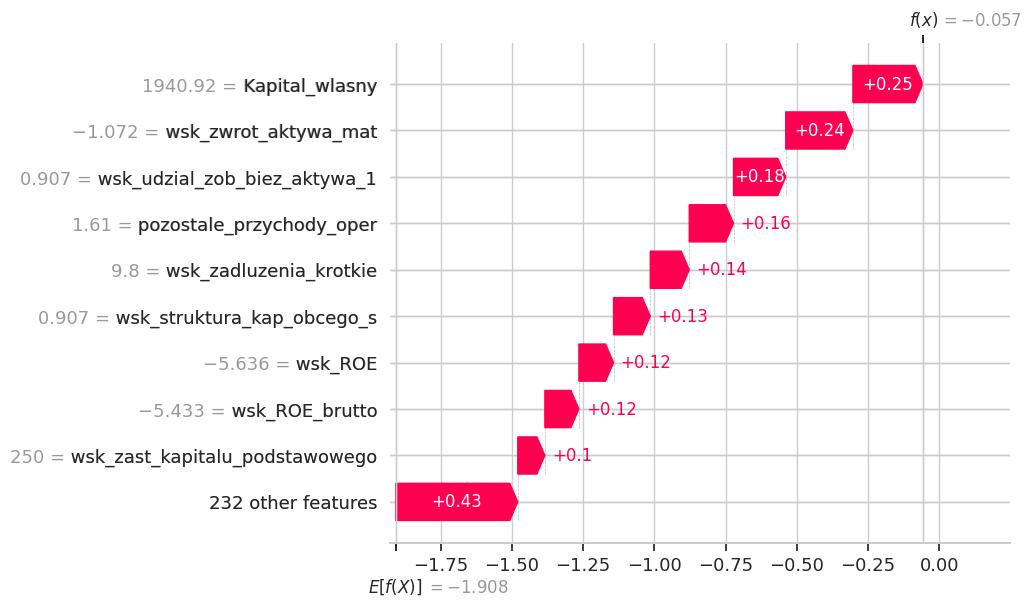


Wysoki PD (ryzykowny) — obserwacja 183
Prawdopodobieństwo defaultu: 71.80%


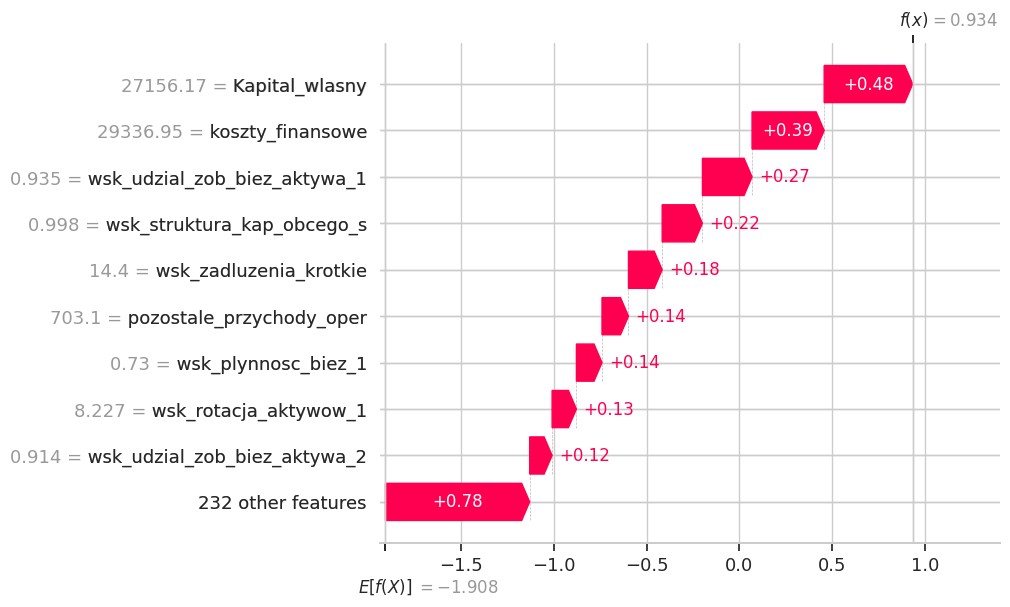

obserwacja          typ_przypadku     PD  \
0         338  Niski PD (bezpieczny)  0.012   
1         278    Graniczny przypadek  0.486   
2         183  Wysoki PD (ryzykowny)  0.718   

                                  Top_cechy_dodatnie  \
0  Rozliczenia_miedzyokresowe_krotkie > 7797.06, ...   
1  Kapital_wlasny <= 40659.09, wsk_zast_kapitalu_...   
2  Kapital_wlasny <= 40659.09, Rozliczenia_miedzy...   

                                    Top_cechy_ujemne  
0  Kapital_wlasny > 1255451.64, formaWlasnosci_Sy...  
1  koszty_finansowe <= 0.00, Zobowiazania_dostaw_...  
2  formaWlasnosci_Symbol_133 <= 0.00, Zobowiazani...

In [27]:
import shap
import numpy as np
import pandas as pd
import warnings
from lime.lime_tabular import LimeTabularExplainer
from IPython.display import display, HTML

warnings.filterwarnings("ignore", category=FutureWarning, module="lime")

# SHAP — nowy obiekt Explanation
shap_values = shap_values_2

# LIME
lime_explainer = LimeTabularExplainer(
    training_data=np.array(X_train_xgb),
    feature_names=X_train_xgb.columns,
    class_names=["No Default", "Default"],
    mode="classification"
)

# Wybór przypadków
sorted_idx = np.argsort(y_pred_proba)
idx_low = sorted_idx[0]
idx_mid = np.argmin(np.abs(y_pred_proba - 0.5))  # graniczny
idx_high = sorted_idx[-1]
case_indices = [idx_low, idx_mid, idx_high]
case_labels = ["Niski PD (bezpieczny)", "Graniczny przypadek", "Wysoki PD (ryzykowny)"]

# Analiza lokalna
summary_rows = []

for idx, label in zip(case_indices, case_labels):
    print(f"\n{label} — obserwacja {idx}")
    print(f"Prawdopodobieństwo defaultu: {y_pred_proba[idx] * 100:.2f}%")

    # SHAP waterfall
    shap.plots.waterfall(shap_values_2[idx], show=True)

    # LIME
    exp = lime_explainer.explain_instance(
        data_row=X_test_xgb.iloc[idx],
        predict_fn=best_model.predict_proba
    )

    try:
        display(HTML(exp.as_html()))
    except Exception:
        print(exp.as_list())

    # Wyodrębnienie top 3 cech z LIME (dodatnie i ujemne wpływy)
    lime_df = pd.DataFrame(exp.as_list(), columns=["cecha", "wpływ"])
    top_plus = ", ".join(lime_df.sort_values("wpływ", ascending=False).head(3)["cecha"])
    top_minus = ", ".join(lime_df.sort_values("wpływ", ascending=True).head(3)["cecha"])

    summary_rows.append({
        "obserwacja": idx,
        "typ_przypadku": label,
        "PD": round(float(y_pred_proba[idx]), 3),
        "Top_cechy_dodatnie": top_plus,
        "Top_cechy_ujemne": top_minus
    })

# Zbiorcze podsumowanie przypadków
local_explanations_df = pd.DataFrame(summary_rows)
display(local_explanations_df)


## 5.6 (ver. 2) Kalibracja probabilistyczna

=== PRE-CAL — model bazowy (XGB) ===
{'AUC': 0.752210433244916, 'LogLoss': 0.3351074969161967, 'Brier': 0.0998425532768332, 'ECE': np.float64(0.03439324095224341)}


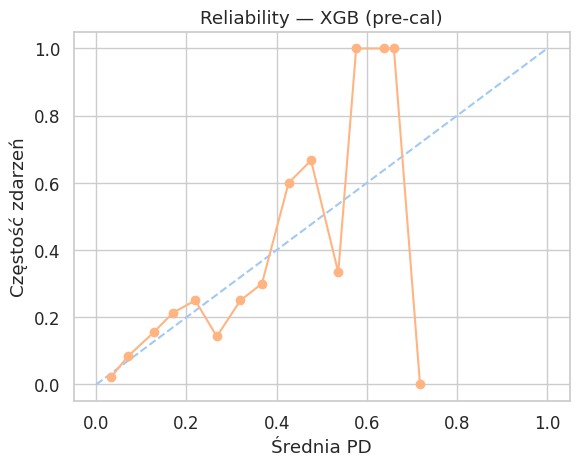

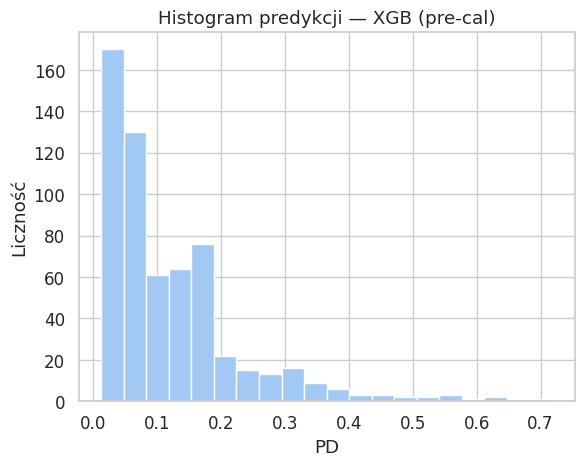

In [46]:
# 5.6 KALIBRACJA PROBABILISTYCZNA (XGBoost)

from sklearn.calibration import calibration_curve
from sklearn.metrics import brier_score_loss, log_loss, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.isotonic import IsotonicRegression


# ---- Funkcje pomocnicze ----

def expected_calibration_error(y_true, p, n_bins=20):
    bins = np.linspace(0, 1, n_bins + 1)
    ece = 0.0
    for i in range(n_bins):
        mask = (p >= bins[i]) & (p < bins[i + 1])
        if mask.any():
            acc = y_true[mask].mean()
            conf = p[mask].mean()
            ece += (mask.sum() / len(p)) * abs(acc - conf)
    return ece


def reliability_plot(y_true, p, title):
    frac_pos, mean_pred = calibration_curve(y_true, p, n_bins=20)
    plt.figure()
    plt.plot([0, 1], [0, 1], '--')
    plt.plot(mean_pred, frac_pos, marker='o')
    plt.xlabel("Średnia PD")
    plt.ylabel("Częstość zdarzeń")
    plt.title(title)
    plt.show()


def hist_predictions(p, title):
    plt.figure()
    plt.hist(p, bins=20)
    plt.title(title)
    plt.xlabel("PD")
    plt.ylabel("Liczność")
    plt.show()


def basic_metrics(y, p):
    return {
        "AUC": roc_auc_score(y, p),
        "LogLoss": log_loss(y, p),
        "Brier": brier_score_loss(y, p),
        "ECE": expected_calibration_error(y, p)
    }


# PRE-CAL DIAGNOSTYKA (test)

p_test_base = best_model.predict_proba(X_test_xgb)[:, 1]

print("=== PRE-CAL — model bazowy (XGB) ===")
print(basic_metrics(y_test_xgb, p_test_base))

reliability_plot(y_test_xgb, p_test_base, "Reliability — XGB (pre-cal) - XGBoost")
hist_predictions(p_test_base, "Histogram predykcji — XGB (pre-cal) - XGBoost")


Isotonic (test): {'AUC': 0.7511788977306217, 'LogLoss': 0.35872683754838375, 'Brier': 0.10187945648027825, 'ECE': np.float64(0.026750777233392)}


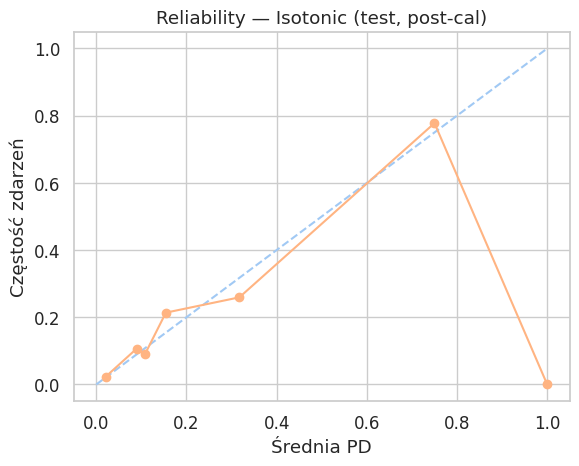

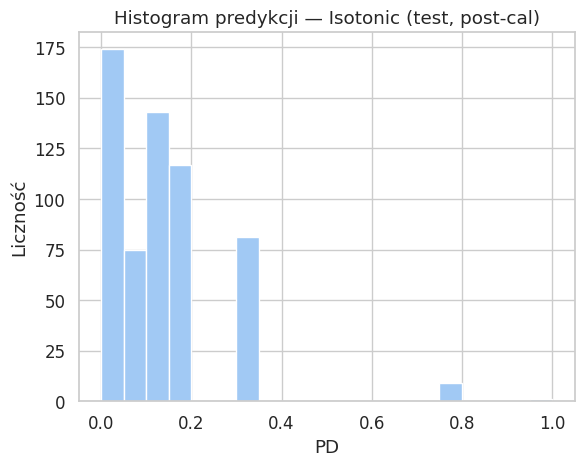

ECE: 0.026750777233392


In [47]:
# Isotonic

def fit_isotonic(y, p):
    ir = IsotonicRegression(out_of_bounds='clip')
    ir.fit(p, y)
    return ir


def apply_isotonic(ir, p):
    return ir.transform(p)


p_valid_base = best_model.predict_proba(X_valid_xgb)[:, 1]
iso_model = fit_isotonic(y_valid_xgb, p_valid_base)

# --- Predykcje na zbiorze testowym ---
p_test_iso = apply_isotonic(iso_model, p_test_base)

print("Isotonic (test):", basic_metrics(y_test_xgb, p_test_iso))
reliability_plot(y_test_xgb, p_test_iso, "Reliability — Isotonic (test, post-cal) - XGBoost")
hist_predictions(p_test_iso, "Histogram predykcji — Isotonic (test, post-cal) - XGBoost")
print("ECE:", expected_calibration_error(y_test_xgb, p_test_iso))

# === PRE-CAL — model bazowy (XGB) ===
# {'AUC': 0.7387868269094323, 'LogLoss': 0.34344834033462157, 'Brier': 0.10232328030002714, 'ECE': np.float64(0.03145723630984624)}

In [48]:
# Calibration-in-the-large do PD = 4%

def logit(p):
    eps = 1e-12
    p = np.clip(p, eps, 1 - eps)
    return np.log(p / (1 - p))


def inv_logit(z):
    return 1 / (1 + np.exp(-z))


def citl_shift(p, target_mean=0.04):
    z = logit(p)
    lo, hi = -10, 10
    for _ in range(100):
        mid = (lo + hi) / 2
        m = inv_logit(z + mid).mean()
        if m < target_mean:
            lo = mid
        else:
            hi = mid
    return inv_logit(z + mid)


p_test_iso_4 = citl_shift(p_test_iso, target_mean=0.04)

print("Średnia PD po CITL (cel 0.04):", p_test_iso_4.mean())


Średnia PD po CITL (cel 0.04): 0.04


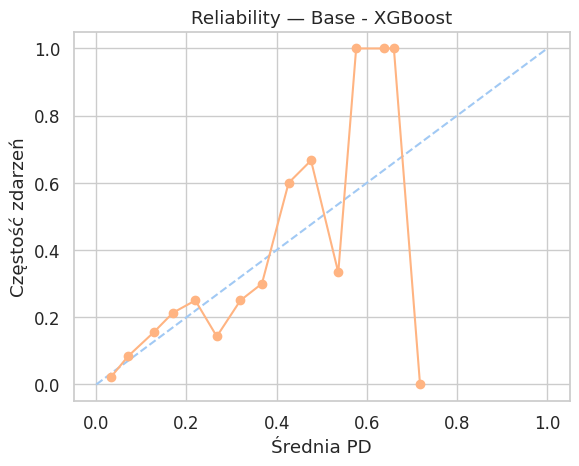

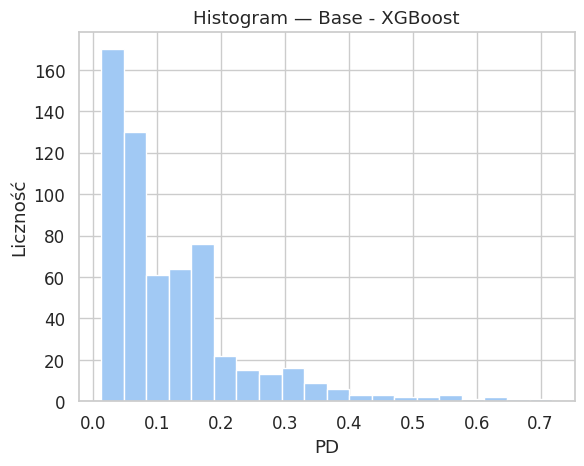

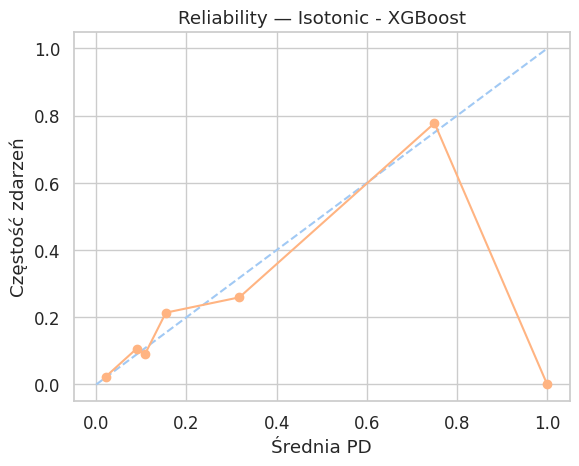

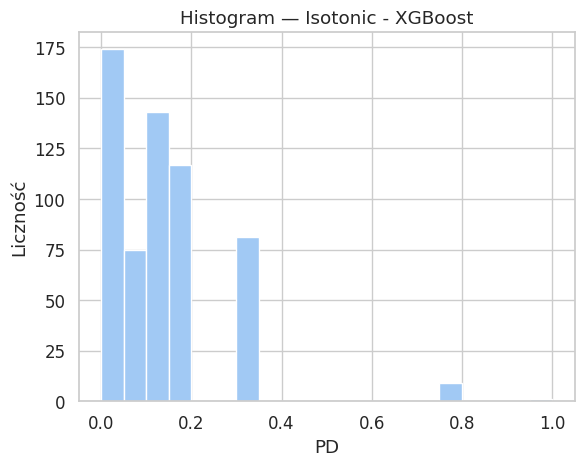

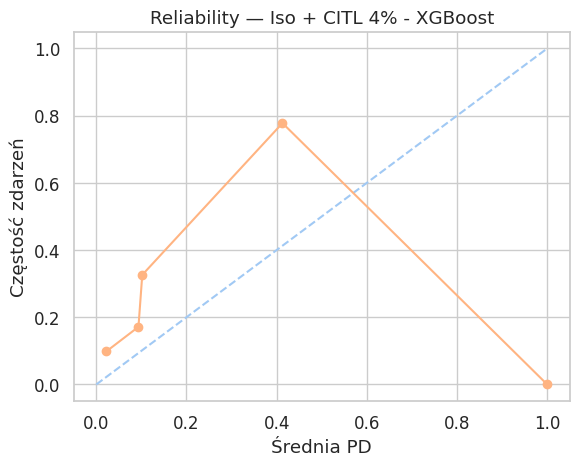

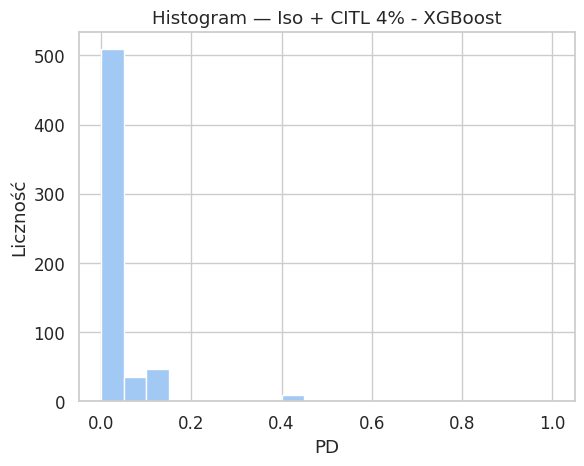

In [57]:
models = {
    "Base": p_test_base,
    "Isotonic": p_test_iso,
    "Iso + CITL 4%": p_test_iso_4
}

# pd.DataFrame({
#     m: basic_metrics(y_test_xgb, p)
#     for m, p in models.items()
# }).T

for name, p in models.items():
    reliability_plot(y_test_xgb, p, f"Reliability — {name} - XGBoost")
    hist_predictions(p, f"Histogram — {name} - XGBoost")

## 5.7 (ver. 2) Progi decyzyjne i ratingi

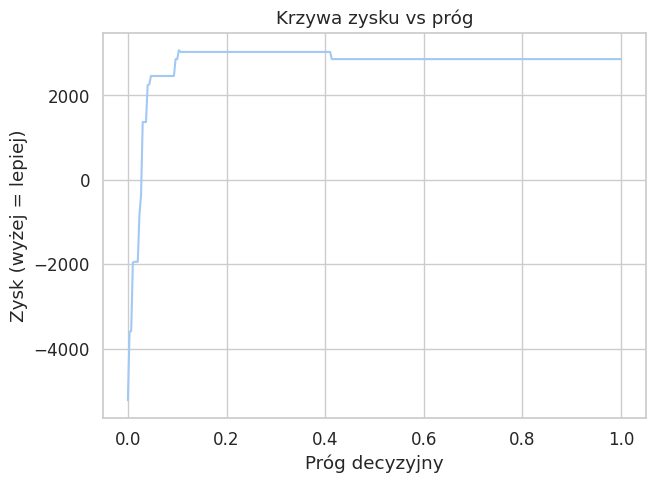

=== Najlepszy próg - XGBoost ===
Próg: 0.10333333333333335
TP, FP, FN, TN: 9 4 69 518
Stopa akceptacji: 0.0217
Maksymalny zysk: 3070


In [55]:
# 5.7 PROGI DECYZYJNE I RATINGI

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# FUNKCJE KOSZTÓW I PRZEGLĄD PROGÓW

# Koszty
COST_TP = 0  # zysk z odrzucenia złego klienta (oszczędzona strata)
COST_FP = -10  # koszt odrzucenia dobrego klienta (utracony zysk)
COST_FN = -30  # koszt przepuszczenia złego
COST_TN = +10  # zysk z dobrego klienta

def cost_for_threshold(y_true, p, thr):
    yhat = (p >= thr).astype(int)
    tp = np.sum((yhat == 1) & (y_true == 1))
    fp = np.sum((yhat == 1) & (y_true == 0))
    fn = np.sum((yhat == 0) & (y_true == 1))
    tn = np.sum((yhat == 0) & (y_true == 0))
    return tp * COST_TP + fp * COST_FP + fn * COST_FN + tn * COST_TN, tp, fp, fn, tn


def sweep_costs(y_true, p, n=101):
    thrs = np.linspace(0, 1, n)
    costs, details = [], []
    for t in thrs:
        c, tp, fp, fn, tn = cost_for_threshold(y_true, p, t)
        costs.append(c);
        details.append((tp, fp, fn, tn))
    return thrs, np.array(costs), details


# WYZNACZENIE NAJLEPSZEGO PROGU (Isotonic + CITL)

# Skalibrowane predykcje: p_test_iso_4
thrs, costs, details = sweep_costs(y_test_xgb, p_test_iso_4, n=301)

best_idx = int(np.argmax(costs))
best_thr = float(thrs[best_idx])
best_tp, best_fp, best_fn, best_tn = details[best_idx]

# Wykres cost curve
plt.figure(figsize=(7, 5))
plt.plot(thrs, costs)
plt.title("Krzywa zysku vs próg")
plt.xlabel("Próg decyzyjny")
plt.ylabel("Zysk (wyżej = lepiej)")
plt.grid(True)
plt.show()

# Wyniki
print("=== Najlepszy próg - XGBoost ===")
print("Próg:", best_thr)
print("TP, FP, FN, TN:", best_tp, best_fp, best_fn, best_tn)
accept_rate = (best_tp + best_fp) / len(y_test_xgb)
print("Stopa akceptacji:", round(accept_rate, 4))
print("Maksymalny zysk:", costs[best_idx])

In [51]:
# MAPOWANIE PD → RATING (AAA — D)

# Domyślne progi ratingów
rating_bins = [
    0.000,  # AAA
    0.001,  # AA
    0.005,  # A
    0.020,  # BBB
    0.050,  # BB
    0.100,  # B
    0.200,  # CCC
    1.001
]

rating_labels = ["AAA", "AA", "A", "BBB", "BB", "B", "CCC"]


def pd_to_rating(p):
    return pd.cut(
        p,
        bins=rating_bins,
        labels=rating_labels,
        right=False,
        include_lowest=True
    )


ratings = pd_to_rating(p_test_iso_4)

print("\n=== Liczba obserwacji w ratingach ===")
display(pd.crosstab(ratings, columns="count"))




=== Liczba obserwacji w ratingach ===


col_0  count
row_0       
AAA       81
A         93
BBB      335
BB        35
B         46
CCC       10


=== Średnie PD per rating ===


PD
rating              
AAA     2.344242e-13
AA               NaN
A       9.394633e-03
BBB     3.118859e-02
BB      9.350221e-02
B       1.019454e-01
CCC     4.716054e-01

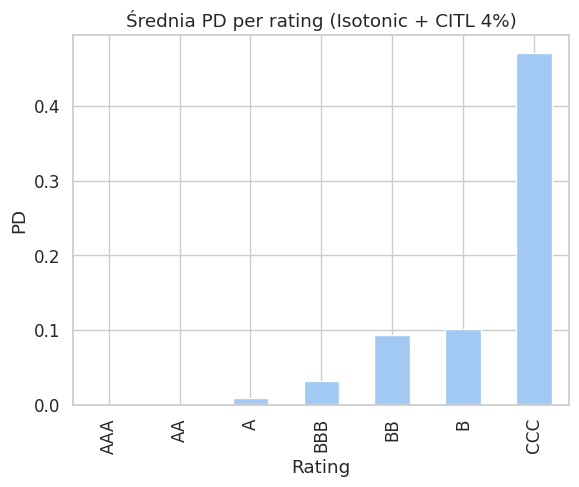

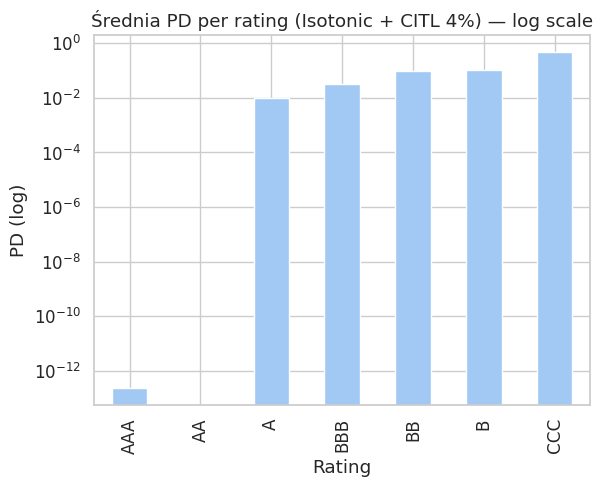

In [52]:
# 4) ŚREDNIE PD PER RATING

mean_pd = (
    pd.DataFrame({"PD": p_test_iso_4})
    .assign(rating=ratings)
    .groupby("rating")
    .mean()
)

print("\n=== Średnie PD per rating ===")
display(mean_pd)

# Wykres zwykły (baseline)
mean_pd.plot(kind="bar", legend=False)
plt.title("Średnia PD per rating (Isotonic + CITL 4%)")
plt.ylabel("PD")
plt.xlabel("Rating")
plt.show()

# Wykres logarytmiczny
ax = mean_pd.plot(kind="bar", legend=False)
ax.set_yscale("log")
plt.title("Średnia PD per rating (Isotonic + CITL 4%) — log scale")
plt.ylabel("PD (log)")
plt.xlabel("Rating")
plt.show()